# ML for animal adoption: <font color='red'>EDA portion pt 1

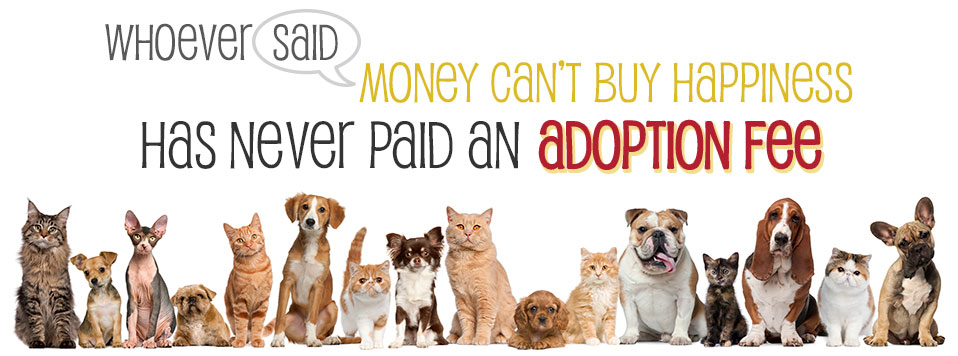

In [1]:
import vaex   as vx #this library not as friendly as pandas
import pandas as pd
from pprint import pprint as pp
import pandas_profiling   as pdp
from pandas_profiling.utils.cache import cache_file
import matplotlib.pyplot  as plt
from yellowbrick.target import FeatureCorrelation
import zipfile

path = "C:/Users/hi/Desktop/DATA SCIENCE/05 Data science fundamentals module 05/CAPSTONE"
print(os.listdir(path))

<IPython.core.display.Javascript object>

['.ipynb_checkpoints', 'animal care and control adopted animals.zip', 'Capstone DS106 - EDA portion of ML (Lim Kiat Hao).ipynb', 'Capstone DS106 - EDA portion of ML pt2 (Lim Kiat Hao).ipynb', 'images', 'LKH - Project Proposal - CAPSTONE PROJECT (DS 106).pdf', 'univariate_report.html', 'univariate_reportv6.html', 'univariate_reportv8.html', 'versions']


In [2]:
path = path+"/"+os.listdir(path)[1]
path #copy & paste the path!

<IPython.core.display.Javascript object>

'C:/Users/hi/Desktop/DATA SCIENCE/05 Data science fundamentals module 05/CAPSTONE/animal care and control adopted animals.zip'

### Snippet of what the data looks like (Yes you will see it again in the pdp)

In [3]:
zf = zipfile.ZipFile(path)                            #Zipfile
adoption = pd.read_csv(zf.open('animal-data-1.csv'))  #open a Zipfile
adoption = adoption.sort_values(by=['intakedate',"movementdate"], ascending=True).reset_index().drop(columns="index")
adoption

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2018-05-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,981020029330984,Max,Domestic Medium Hair,Orange and White,Cat,...,2019-08-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10286,64588,2019-08-27 18:14:11,Stray,0,C19081418,981020033133599,Punkin,Domestic Short Hair,Calico,Cat,...,2019-08-28 00:00:00,Foster,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10287,64606,2019-08-29 12:10:21,Stray,0,D19081440,0A1243400C,Dozer,Coonhound,Red,Dog,...,2019-08-29 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10288,64608,2019-08-29 18:58:06,Stray,0,D19081421,982000363034690,Lucy Farmer,Beagle,Tricolour,Dog,...,2019-08-30 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0


In [4]:
adoption[['intakedate',"movementdate"]]

,intakedate,movementdate
0,2009-11-28 00:00:00,2017-05-13 00:00:00
1,2009-12-08 00:00:00,2017-04-24 00:00:00
2,2012-08-10 00:00:00,2017-04-15 00:00:00
3,2013-01-11 00:00:00,2017-04-18 00:00:00
4,2013-01-11 00:00:00,2018-05-29 00:00:00
...,...,...
10285,2019-08-27 16:52:09,2019-08-29 00:00:00
10286,2019-08-27 18:14:11,2019-08-28 00:00:00
10287,2019-08-29 12:10:21,2019-08-29 00:00:00
10288,2019-08-29 18:58:06,2019-08-30 00:00:00


## Label: Multi-Class Label:
    - Adopted
    - Adopted & Returned
    - Not adopted

In [5]:
import warnings
warnings.filterwarnings('ignore')
he     = adoption[adoption.movementtype =="Adoption"][adoption.returndate.isna()]
hehe   = adoption[adoption.movementtype =="Adoption"][adoption.returndate.notna()]
hehehe = adoption[adoption.movementtype !="Adoption"]
print('Adopted is          \033[1m\033[92m'+str(len(he))    +'\033[0m')
print('Adopted & return is \033[1m\033[91m'+str(len(hehe))  +'\033[0m')
print('Not Adopted is      \033[1m\033[92m'+str(len(hehehe))+'\033[0m')
print("-"*25)
print("sum of the 3 is    ",len(he)+len(hehe)+len(hehehe))
print("Total is           ",len(adoption))

Adopted is          5184
Adopted & return is 626
Not Adopted is      4480
-------------------------
sum of the 3 is     10290
Total is            10290


#### <font color='red'> 626 is quite small -> imbalanced
#### <font color='red'> -> Smote it or use class_weight = balanced for Random Forests

### Creating the label

In [6]:
# if warnings have been suppressed, they are now re-enabled
warnings.filterwarnings('default')
#booleans for my 3 classes within my label
adopted          = np.logical_and(adoption.movementtype =="Adoption",adoption.returndate.isna())
adopted_returned = np.logical_and(adoption.movementtype =="Adoption",adoption.returndate.notna())
not_adopted      = adoption.movementtype !="Adoption"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
wow = pd.Series("Adoption",           index = adopted.index)
wow[adopted_returned] = "Adopted & Returned"
wow[not_adopted] = "Not Adopted"
print("New column called label")
wow.value_counts()

New column called label


C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Adoption              5184
Not Adopted           4480
Adopted & Returned     626
dtype: int64

### looks nice lets ordinal encode it so our Machine can understand it
- adoption > Adopted & returned > Not adopted

In [8]:
wow = pd.Series(1,           index = adopted.index)
wow[adopted_returned] = 0
wow[not_adopted] = -1
print("New column called label")
wow.value_counts()

New column called label


 1    5184
-1    4480
 0     626
dtype: int64

In [9]:
adoption["label"] = wow
print("New column called label")
adoption["label"].value_counts()

New column called label


 1    5184
-1    4480
 0     626
Name: label, dtype: int64

<IPython.core.display.Javascript object>

My colour theme:
['#e5d7c2', '#d3ab99', '#bc7f7f', '#9b586c', '#6d3657', '#371a36']


<IPython.core.display.Javascript object>

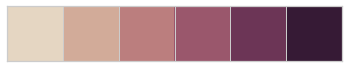

In [10]:
pal = sns.color_palette("ch:.25")
print("My colour theme:\n"+str(pal.as_hex()))
sns.palplot(pal)

<IPython.core.display.Javascript object>

Text(0.0, 1.0, 'label distribution')

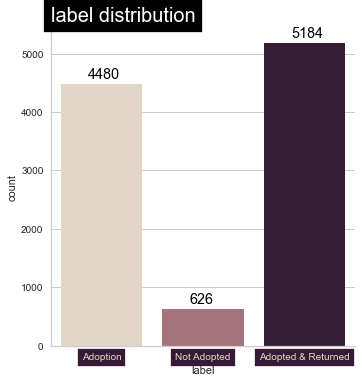

In [11]:
g=sns.catplot(data=adoption,x="label",palette="ch:.25",kind="count")
ax = g.facet_axis(0,0)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/3, 
            height+100, 
            '%d' % int(height),
#             '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.xticks([0,1,2],["Adoption","Not Adopted","Adopted & Returned"],c="#e5d7c2",backgroundcolor="#371a36")
plt.title("label distribution",c="White",backgroundcolor="black",size=20,loc="left")

### More info. of the data

In [12]:
adoption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10290 non-null  int64  
 1   intakedate        10290 non-null  object 
 2   intakereason      10288 non-null  object 
 3   istransfer        10290 non-null  int64  
 4   sheltercode       10290 non-null  object 
 5   identichipnumber  8324 non-null   object 
 6   animalname        10290 non-null  object 
 7   breedname         10245 non-null  object 
 8   basecolour        10290 non-null  object 
 9   speciesname       10290 non-null  object 
 10  animalage         10290 non-null  object 
 11  sexname           10290 non-null  object 
 12  location          10290 non-null  object 
 13  movementdate      10290 non-null  object 
 14  movementtype      10290 non-null  object 
 15  istrial           10289 non-null  float64
 16  returndate        3256 non-null   object

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### no. of Unique values of the data

In [13]:
adoption.nunique()

id                  7288
intakedate          5306
intakereason          25
istransfer             2
sheltercode         7288
identichipnumber    5460
animalname          4336
breedname            799
basecolour            78
speciesname           27
animalage            273
sexname                3
location              39
movementdate         872
movementtype           7
istrial                1
returndate           756
returnedreason        24
deceaseddate         211
deceasedreason        13
diedoffshelter         2
puttosleep             2
isdoa                  2
label                  3
dtype: int64

### what each column stands for

- id: 
    - ID of animal
- intakedate: 
    - the date he/she has been taken by the shelter
- intakereason
    - reason for abandoning animal
- istransfer
    - has animal been transfered
- sheltercode
    - the identify code of the shelter
- identichipnumber
    - the micro-chip id of the pet -> ENCODE
- animalname
    - animal's name -> considering dropping
- breedname
    - the breed of the animal
- basecolour
    - the color of the animal -> consider dropping
- speciesname
    - Animal Species name
- animalage
    - Age
- sexname
    - Binary M/F
- location
    - section of the shelter -> consider dropping
- movementdate
    - the date they have been moved
- movementtype
     - What kind of movement 
- istrial
    - is that trial or confirm change
- returndate
    - Binary 0/1 if animal has been returned
- returnedreason
    - why they were been returned
- deceaseddate
    - date of passing
- deceasedreason
    - reason for passing
- diedoffshelter
    - Binary 0/1 death in shelter
- puttosleep
    - Binary 0/1 whether put to sleep
- isdoa
    - dead on arrival

In [14]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [15]:
profile = pdp.ProfileReport(adoption, title="Animal Adoption Dataset", html={"style": {"full_width": True}})
# profile.to_file("C:/Users/hi/Desktop/DATA SCIENCE/05 Data science fundamentals module 05/CAPSTONE/univariate_report.html")

In [16]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

INFO:Thread-11:numexpr.utils:NumExpr defaulting to 8 threads.


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### turn the integers into floats

In [17]:
adoption_pair = adoption.copy()
categorical_features = [features for features in adoption_pair if adoption_pair[features].dtypes!='O'] 
adoption_pair[categorical_features].astype(float)

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,istransfer,istrial,diedoffshelter,puttosleep,isdoa,label
0,15801.0,0.0,0.0,0.0,0.0,0.0,1.0
1,15932.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28859.0,0.0,0.0,0.0,0.0,0.0,1.0
3,30812.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,30812.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
10285,64584.0,0.0,0.0,0.0,0.0,0.0,1.0
10286,64588.0,0.0,0.0,0.0,0.0,0.0,-1.0
10287,64606.0,0.0,0.0,0.0,0.0,0.0,-1.0
10288,64608.0,0.0,0.0,0.0,0.0,0.0,-1.0


C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

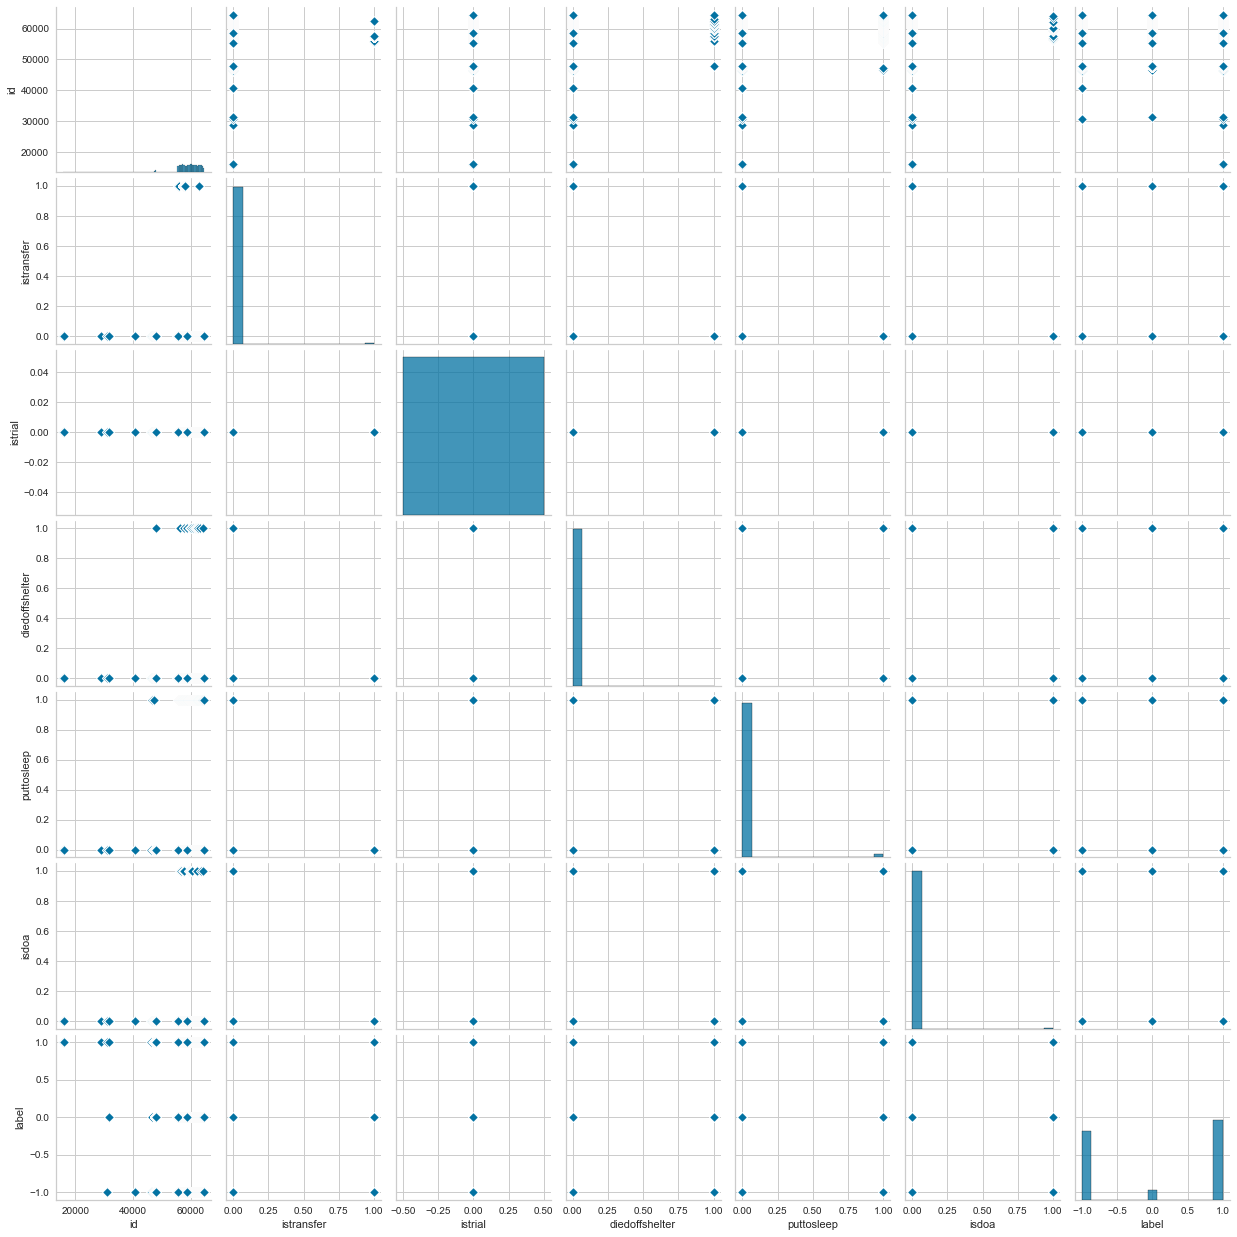

In [18]:
sns.pairplot(adoption_pair,plot_kws=dict(marker="D", linewidth=1),
    diag_kws=dict(fill=True))

### I literally have no continuous data for nice looking plots like boxplot, violinplots etc.

In [19]:
feats = []
for i in adoption.columns:
    if len(adoption[i].unique()) <300:
        feats.append(i)
feats

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['intakereason',
 'istransfer',
 'basecolour',
 'speciesname',
 'animalage',
 'sexname',
 'location',
 'movementtype',
 'istrial',
 'returnedreason',
 'deceaseddate',
 'deceasedreason',
 'diedoffshelter',
 'puttosleep',
 'isdoa',
 'label']

### Since i dont have a continuous data... lets Try creating adoption rate

In [22]:
placeholderr = adoption.index.to_list().copy()
for i in placeholderr:
        placeholderr[i] +=1 
placeholderr = pd.Series(placeholderr).rename("re-index")
adoption_count = []
count = 0 
for i in adoption.label:
    if i == 1:
        count+=1
    else:
        count+= 0
    adoption_count.append(count)
adoption_count = pd.Series(adoption_count).rename("adoption_count")
adoption_rate_per_intake= pd.Series(0.00,index=placeholderr.index).rename("adoption_rate_per_intake")


    
for i in adoption.index.to_list():
#     print(adoption_count[i],
#           placeholderr[i],float(adoption_count[i])/float(placeholderr[i])*100)
    adoption_rate_per_intake[i] = (float(adoption_count[i])/float(placeholderr[i]))*100
#     print(adoption_rate[i])
mehh = pd.concat([placeholderr,adoption_rate_per_intake,adoption_count,adoption.sexname],axis=1)

In [23]:
intakedate = pd.to_datetime(adoption.intakedate)
movementdate = pd.to_datetime(adoption.movementdate)

#Date features creations and deletions
year_take = intakedate.dt.year.rename("year_take")
month_take= intakedate.dt.month.rename("month_take")
day_take  = intakedate.dt.day.rename("day_take")

year_move = movementdate.dt.year.rename("year_move")
month_move= movementdate.dt.month.rename("month_move")
day_move  = movementdate.dt.day.rename("day_move")

total = pd.Series(1,index=placeholderr.index).rename("total")
time = pd.concat([year_take,month_take,day_take,year_move,month_move,day_move,adoption_rate_per_intake,adoption.label,total],axis=1)

In [24]:
time

,year_take,month_take,day_take,year_move,month_move,day_move,adoption_rate_per_intake,label,total
0,2009,11,28,2017,5,13,100.000000,1,1
1,2009,12,8,2017,4,24,100.000000,1,1
2,2012,8,10,2017,4,15,100.000000,1,1
3,2013,1,11,2017,4,18,75.000000,-1,1
4,2013,1,11,2018,5,29,80.000000,1,1
...,...,...,...,...,...,...,...,...,...
10285,2019,8,27,2019,8,29,50.398600,1,1
10286,2019,8,27,2019,8,28,50.393701,-1,1
10287,2019,8,29,2019,8,29,50.388802,-1,1
10288,2019,8,29,2019,8,30,50.383905,-1,1


In [25]:
for i in time.index:
    if time.label.iloc[i] == -1:
        time.label.iloc[i] = 0
time.label

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\hi\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        1
1        1
2        1
3        0
4        1
        ..
10285    1
10286    0
10287    0
10288    0
10289    0
Name: label, Length: 10290, dtype: int64

In [26]:
timee = time.groupby(["year_take","month_take"]).count()
timee

day_take  year_move  month_move  day_move  \
year_take month_take                                              
2009      11                 1          1           1         1   
          12                 1          1           1         1   
2012      8                  1          1           1         1   
2013      1                  2          2           2         2   
          3                  2          2           2         2   
2015      6                  2          2           2         2   
2016      10                 5          5           5         5   
          11                 1          1           1         1   
2017      1                 15         15          15        15   
          2                 21         21          21        21   
          3                255        255         255       255   
          4                312        312         312       312   
          5                340        340         340       340   
          6                487        487         487       487   
          7                483        483         483       483   
          8                405        405         405       405   
          9                413        413         413       413   
          10               384        384         384       384   
          11               246        246         246       246   
          12               248        248         248       248   
2018      1                236        236         236       236   
          2                227        227         227       227   
          3                236        236         236       236   
          4                242        242         242       242   
          5                501        501         501       501   
          6                489        489         489       489   
          7                395        395         395       395   
          8                402        402         402       402   
          9                401        401         401       401   
          10               396        396         396       396   
          11               301        301         301       301   
          12               294        294         294       294   
2019      1                199        199         199       199   
          2                228        228         228       228   
          3                206        206         206       206   
          4                373        373         373       373   
          5                484        484         484       484   
          6                435        435         435       435   
          7                363        363         363       363   
          8                258        258         258       258   

                      adoption_rate_per_intake  label  total  
year_take month_take                                          
2009      11                                 1      1      1  
          12                                 1      1      1  
2012      8                                  1      1      1  
2013      1                                  2      2      2  
          3                                  2      2      2  
2015      6                                  2      2      2  
2016      10                                 5      5      5  
          11                                 1      1      1  
2017      1                                 15     15     15  
          2                                 21     21     21  
          3                                255    255    255  
          4                                312    312    312  
          5                                340    340    340  
          6                                487    487    487  
          7                                483    483    483  
          8                                405    405    405  
          9                                413    413    413  
          

In [27]:
timeee = time.drop(columns="adoption_rate_per_intake").groupby(["year_take","month_take"]).sum()
timeee
timeeee = pd.concat([timee[["day_take","year_move","month_move","day_move"]],timeee[["label","total"]]],axis=1)
timeeee["adoption per month per year"] = timeeee["label"] / timeeee["total"]
timeeee

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_take  year_move  month_move  day_move  label  total  \
year_take month_take                                                            
2009      11                 1          1           1         1      1      1   
          12                 1          1           1         1      1      1   
2012      8                  1          1           1         1      1      1   
2013      1                  2          2           2         2      1      2   
          3                  2          2           2         2      1      2   
2015      6                  2          2           2         2      0      2   
2016      10                 5          5           5         5      1      5   
          11                 1          1           1         1      1      1   
2017      1                 15         15          15        15      8     15   
          2                 21         21          21        21      8     21   
          3                255        255         255       255    111    255   
          4                312        312         312       312    144    312   
          5                340        340         340       340    163    340   
          6                487        487         487       487    256    487   
          7                483        483         483       483    236    483   
          8                405        405         405       405    198    405   
          9                413        413         413       413    214    413   
          10               384        384         384       384    197    384   
          11               246        246         246       246    149    246   
          12               248        248         248       248    136    248   
2018      1                236        236         236       236    101    236   
          2                227        227         227       227    117    227   
          3                236        236         236       236    117    236   
          4                242        242         242       242    116    242   
          5                501        501         501       501    222    501   
          6                489        489         489       489    227    489   
          7                395        395         395       395    199    395   
          8                402        402         402       402    225    402   
          9                401        401         401       401    231    401   
          10               396        396         396       396    207    396   
          11               301        301         301       301    157    301   
          12               294        294         294       294    158    294   
2019      1                199        199         199       199    108    199   
          2                228        228         228       228    117    228   
          3                206        206         206       206    115    206   
          4                373        373         373       373    184    373   
          5                484        484         484       484    251    484   
          6                435        435         435       435    220    435   
          7                363        363         363       363    184    363   
          8                258        258         258       258    101    258   

                      adoption per month per year  
year_take month_take                               
2009      11                             1.000000  
          12                             1.000000  
2012      8                              1.000000  
2013      1                              0.500000  
          3                              0.500000  
2015      6                              0.000000  
2016      10                             0.200000  
          11                             1.000000  
2017      1                              0.533333  
          2                              0.3809

In [28]:
meow = time.drop(columns="adoption_rate_per_intake").groupby(["year_take"]).sum()
meow

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,month_take,day_take,year_move,month_move,day_move,label,total
year_take,,,,,,,
2009,23,36,4034,9,37,2,2
2012,8,10,2017,4,15,1,1
2013,8,74,8065,17,86,2,4
2015,12,38,4034,8,24,0,2
2016,61,100,12102,32,88,2,6
2017,26552,55589,7279757,26852,54462,1820,3609
2018,28194,64272,8314521,28548,63485,2077,4120
2019,12400,39512,5140373,14037,41313,1280,2546


## From the graph we can see that the adoption rate remains relatively linear over the years 
## <font color="red"> AKA not time sensitive

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='re-index', ylabel='adoption_rate_per_intake'>

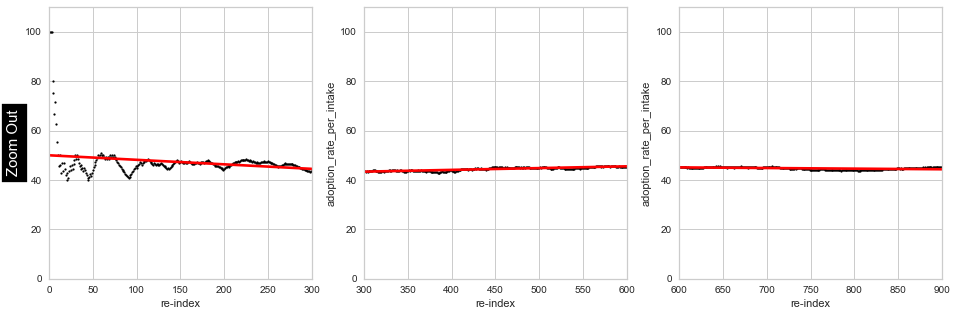

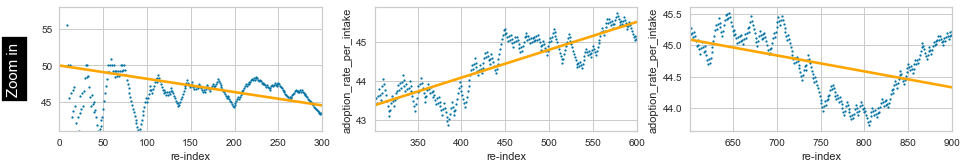

In [29]:
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1,3,1)
sns.regplot(x="re-index", y="adoption_rate_per_intake",data=mehh[:300],ci=None,
           scatter_kws={"s": 5, "alpha": 1,"color": "black"}, line_kws={"color": "red"})
ax1.set_ylabel("Zoom Out",c="White",backgroundcolor="black",size=15)
ax1.set(xlim=(0,300), ylim=(0, 110))
ax1 = fig.add_subplot(1,3,2)
sns.regplot(x="re-index", y="adoption_rate_per_intake",data=mehh[300:600],ci=None,
           scatter_kws={"s": 5, "alpha": 1,"color": "black"}, line_kws={"color": "red"})
ax1.set(xlim=(300,600), ylim=(0, 110))
ax1 = fig.add_subplot(1,3,3)
sns.regplot(x="re-index", y="adoption_rate_per_intake",data=mehh[600:900],ci=None,
           scatter_kws={"s": 5, "alpha": 1,"color": "black"}, line_kws={"color": "red"})
ax1.set(xlim=(600,900), ylim=(0, 110))

fig = plt.figure(figsize = (16,5))
ax2 = fig.add_subplot(2,3,1)
sns.regplot(x="re-index", y="adoption_rate_per_intake",data=mehh[:300],ci=None,
           scatter_kws={"s": 5, "alpha": 1}, line_kws={"color": "orange"})
ax2.set_ylabel("Zoom in",c="White",backgroundcolor="black",size=15,labelpad=20)
ax2.set(xlim=(0,300), ylim=(41,58))
ax2 = fig.add_subplot(2,3,2)
sns.regplot(x="re-index", y="adoption_rate_per_intake",data=mehh[300:600],ci=None,
           scatter_kws={"s": 5, "alpha": 1}, line_kws={"color": "orange"})
ax2 = fig.add_subplot(2,3,3)
sns.regplot(x="re-index", y="adoption_rate_per_intake",data=mehh[600:900],ci=None,
           scatter_kws={"s": 5, "alpha": 1}, line_kws={"color": "orange"})

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[(0.0, 10500.0), (40.0, 55.0)]

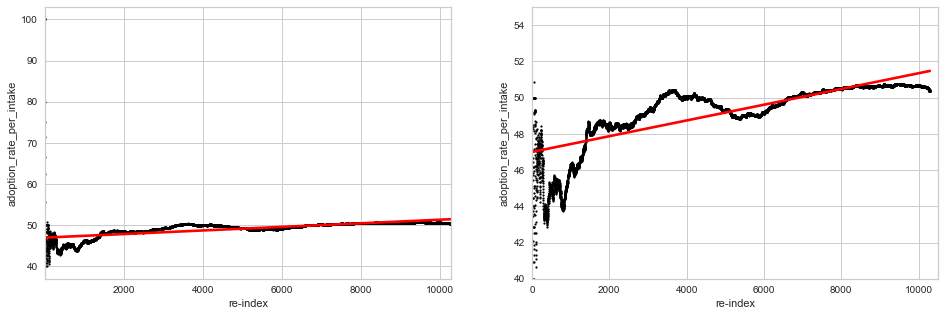

In [30]:
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1,2,1)
sns.regplot(x="re-index", y="adoption_rate_per_intake",data=mehh,ci=None,
           scatter_kws={"s": 5, "alpha": 1,"color": "black"}, line_kws={"color": "red"})
ax1 = fig.add_subplot(1,2,2)
sns.regplot(x="re-index", y="adoption_rate_per_intake",data=mehh,ci=None,
           scatter_kws={"s": 5, "alpha": 1,"color": "black"}, line_kws={"color": "red"})
ax1.set(xlim=(0,10500), ylim=(40, 55))

### Lets analyze the adoption rate in months instead

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

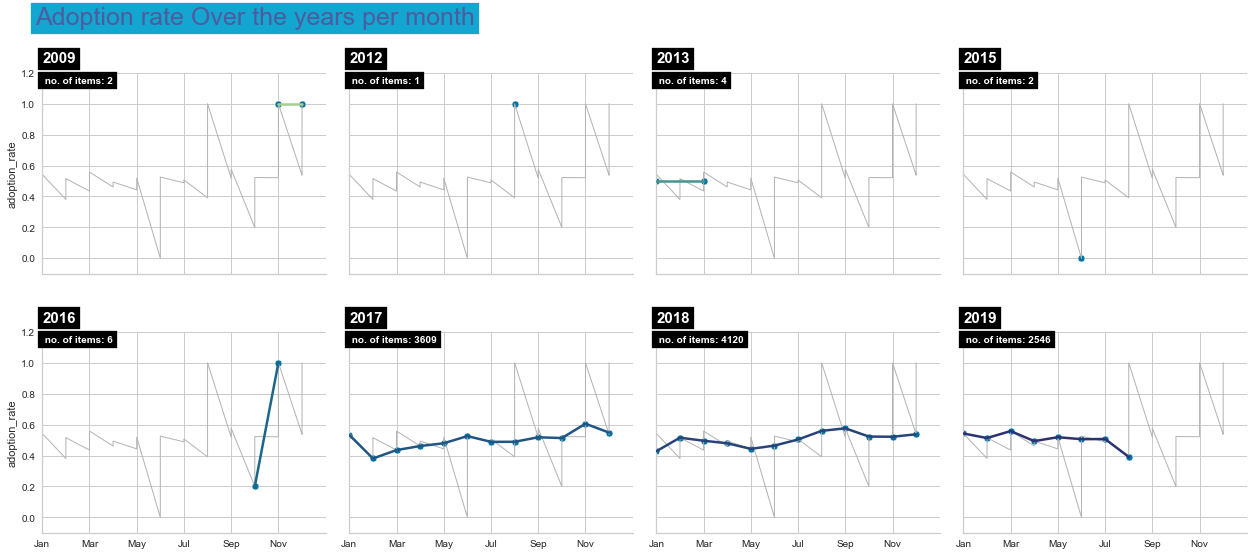

In [31]:
# Plot each year's time series in its own facet
plt.close("all")
g = sns.relplot(
    data=timeeee,
    x="month_take", y="adoption per month per year", col="year_take", hue="year_take",
    kind="line", palette="crest", linewidth=2.5, zorder=5,
    col_wrap=4, height=2, aspect=1.5, legend=False)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(0, 1.05, str(year), transform=ax.transAxes, fontweight="bold",size=15,c="white",backgroundcolor="black")
    ax.text(0, 0.95, " no. of items: "+str(len(time.month_take[time.year_take==year])), transform=ax.transAxes, 
            fontweight="bold",size=10,c="white",backgroundcolor="black")

    sns.lineplot(data=timeeee, x="month_take", y="adoption per month per year",estimator=None, color=".7", linewidth=1,ax=ax)
    ax.set_xticks(np.arange(1,13))
    g.set(xlim=(1,13), ylim=(-0.1, 1.2))
    sns.scatterplot(data=timeeee.xs(year, level='year_take'), x=timeeee.xs(year, level='year_take').index, y="adoption per month per year",palette ="deep",ax=ax,sizes=30)
#     ax.legend(loc='upper center', bbox_to_anchor=(0.7, -0.2),fancybox=True, shadow=True, ncol=3)
#     sns.scatterplot(data=timeeee, x="month_take", y="adoption per month per year",hue="label",palette ="dark:salmon_r",ax=ax )

#     ax.set_xticks(np.arange(1,13))

#     g.set(xlim=(1,12), ylim=(0, 110))
#     sns.scatterplot(data=time, x="month_take", y="adoption_rate", ax=ax,hue="label")
    # Plot every year's time series in the background
#     if year in year_take.unique().tolist():
#         sns.lineplot(data=time_year, x="month_take", y="adoption_rate",estimator=None, color=".7", linewidth=1, ax=ax)
    
    
    
    

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "adoption_rate")
g.tight_layout()
g.fig.set_figwidth(18)
g.fig.set_figheight(8)

g.set_xticklabels(["Jan","Mar","May","Jul","Sep","Nov"])
plt.title("Adoption rate Over the years per month",x=-2.5,y=2.5,size=25,c="#4E5C9F",backgroundcolor="#13A6D0")
plt.show()

# __Dealing with missing data...__

#### Incase looking at the PP is not your thing, lets transplant the missing values graph here

In [32]:
placeholder = ~adoption.isnull()
placeholder = placeholder.astype(int)
placeholder.head(1)

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,label
0,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,1,1,1,1,1


In [33]:
# for i in notblank:
#     print(adoption[i][adoption[i].isna()]) 

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

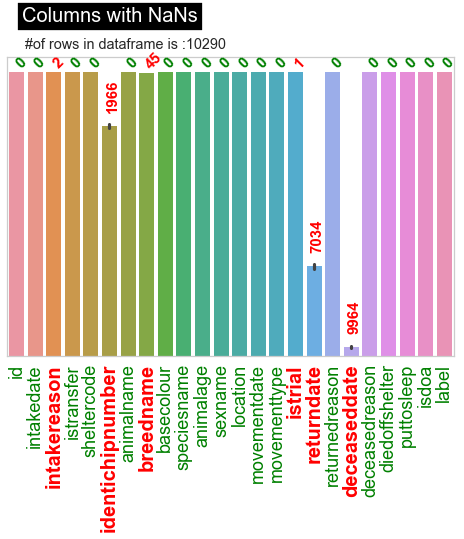

In [34]:
hoho=sns.barplot(data=placeholder)
for bar in hoho.patches:
    height = bar.get_height()
    if int(round(float(height)*10290)) ==10290:
        plt.text(bar.get_x() + bar.get_width()/3.6, height+0.005,
                     10290 - int(round(float(height)*10290)),
                    ha='left', va='bottom',c = "green",size = 15,weight ="demi",rotation = 45)
    elif int(round(float(height)*10290)) >10000: 
        plt.text(bar.get_x() + bar.get_width()/3.6, height+0.005,
                     10290-int(round(float(height)*10290)),
                    ha='left', va='bottom',c = "red",size = 15,weight ="demi",rotation = 45)
    else:
        plt.text(bar.get_x() + bar.get_width()/3.6, height+0.05,
                     10290-int(round(float(height)*10290)),
                    ha='left', va='bottom',c = "red",size = 15,weight ="demi",rotation = 90)
blank=[]
notblank=[]
for i in adoption.dropna().columns:
    if len(adoption[i].dropna()) < 10290:
        blank.append(i)
    else:
        notblank.append(i)
plt.yticks([])
plt.xticks(rotation = 90,size=18)
plt.title("Columns with NaNs",size =20,x=0.23,y=1.1,c="white",backgroundcolor="black")
plt.suptitle("#of rows in dataframe is :"+str(len(adoption)),x=0.33,y=0.93)
for ticklabel in plt.gca().get_xticklabels():
    if ticklabel.get_text() in blank:
        ticklabel.set_color("red")
        #     ticklabel.set_backgroundcolor(tc)
        ticklabel.set_fontweight('bold')
        ticklabel.set_size(20)
    else:
        ticklabel.set_color("green")
plt.show()

### List of columns with Nas and how the data looks like

In [35]:
has_na = adoption.loc[:, adoption.isna().any()]
print(has_na.columns.tolist())
has_na.head(3)

['intakereason', 'identichipnumber', 'breedname', 'istrial', 'returndate', 'deceaseddate']


C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,intakereason,identichipnumber,breedname,istrial,returndate,deceaseddate
0,Moving,0A115D7358,Domestic Short Hair,0.0,NaN,NaN
1,Moving,0A11675477,German Shepherd Dog/Mix,0.0,NaN,NaN
2,Abandoned,0A13253C7B,Shep Mix/Siberian Husky,0.0,NaN,NaN


### <font color='darkblue'>'intakereason', 'identichipnumber', 'breedname', 'istrial', 'returndate', 'deceaseddate'
- intakereason -> No reason = change to ---> "Not available"
- identichipnumber -> No chip / have chip -> 0/1
- breedname -> Either drop entire column or one hot all 799 unique values
- deceaseddate -> Not available -> Change to new column alive or not
- istrial -> Drop all 0s
- returndate -> drop already incorporated in the Label

#### 1) <font color='dark green'> intakereason:</font> -> Drop

##### intakereason has 2 missing columns, lets convert these 2  to Not Available 

In [36]:
woww = adoption
mask = woww[adoption.intakereason.isna()]
print(mask.index)
woww.loc[mask.index,"intakereason"]= "Not Available"
print("we have",len(woww.intakereason.unique()),"unique values.")
woww.intakereason[woww.intakereason =="Not Available"]

Int64Index([134, 167], dtype='int64')
we have 26 unique values.


C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


134    Not Available
167    Not Available
Name: intakereason, dtype: object

Text(0.5, 0.5, 'Intake reasons')

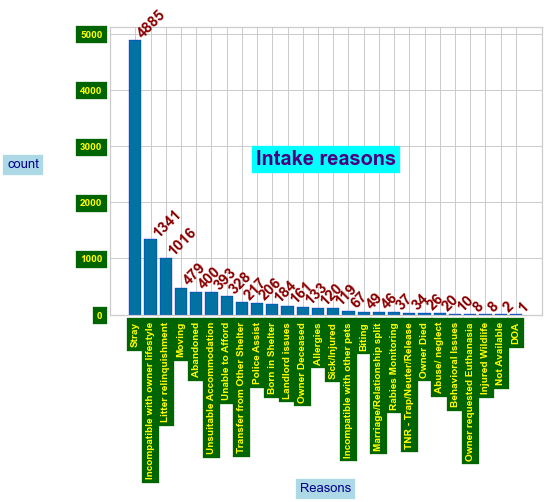

In [37]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1]) 
x= woww.intakereason.value_counts().index
y= woww.intakereason.value_counts()

def label_top_of_bars(bars):
#     Attach a text label above each bar displaying its height
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height+0.005,
                '%d' % int(height),
                ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 45)
bar = ax.bar(x,y,ec="blue")
label_top_of_bars(bar)
plt.ylabel(ylabel = "count", size = 13, c="darkblue",backgroundcolor = "lightblue",rotation =360,labelpad=57.0)
plt.xlabel(xlabel = "Reasons", size = 13, c="darkblue",backgroundcolor = "lightblue")
plt.xticks(size = 10,c ="yellow",weight='demi',rotation = 90,backgroundcolor = "darkgreen") 
plt.yticks(size = 10,c ="yellow",weight='demi',rotation = 0,backgroundcolor = "darkgreen")
plt.title("Intake reasons", size = 20,weight='extra bold',c = "indigo",x=0.5, y=0.5,backgroundcolor="cyan")

### aggregate the values not stray as stray

In [38]:
intakereasons = adoption.intakereason.copy().rename("intake_reason_stray_or_not")
intakereasons[adoption.intakereason!= "Stray"] = "Other"

intakereasons.value_counts()

Other    5405
Stray    4885
Name: intake_reason_stray_or_not, dtype: int64

In [39]:
intakereasons[adoption.intakereason!= "Stray"] = 0
intakereasons[adoption.intakereason== "Stray"] = 1

In [40]:
intakereasons.value_counts()

0    5405
1    4885
Name: intake_reason_stray_or_not, dtype: int64

In [41]:
adoption = pd.concat([adoption,intakereasons],axis=1)

<IPython.core.display.Javascript object>

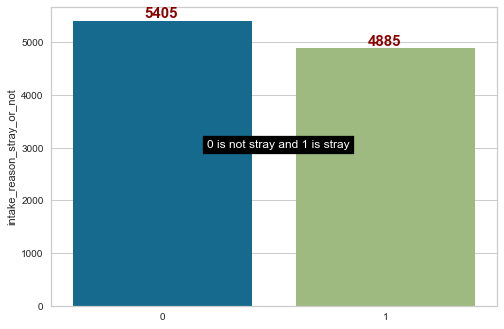

In [42]:
hoho = sns.barplot(x=intakereasons.value_counts().index, y=intakereasons.value_counts())
plt.text(x=0.2, y= 3000,s="0 is not stray and 1 is stray", c= "White",backgroundcolor="black")
for bar in hoho.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.5, height+0.005,
                '%d' % int(height),
                ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)

#### 2) <font color='dark green'> identichipnumber: </font> ->Drop
#### .....  chippedornot ------> Add

In [43]:
chipped_ornot = adoption.identichipnumber.rename("chipped_ornot") 

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
chipped_ornot[adoption.identichipnumber.notna()] = 1
chipped_ornot[adoption.identichipnumber.isna()] = 0
chipped_ornot.value_counts()

1    8324
0    1966
Name: chipped_ornot, dtype: int64

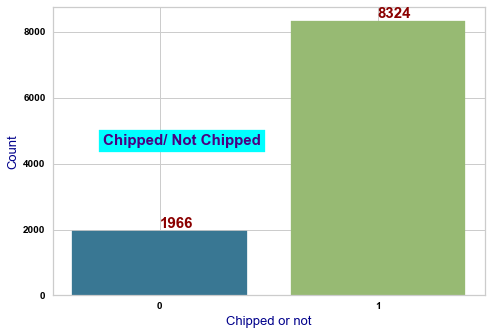

In [45]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1]) 
x= chipped_ornot.value_counts().index
y= chipped_ornot.value_counts()

def label_top_of_bars(bars):
#     Attach a text label above each bar displaying its height
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height+0.005,
                '%d' % int(height),
                ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)

bars = ax.bar(x,y,ec="blue")
label_top_of_bars(bars)
plt.ylabel(ylabel = "Count", size = 13, c="darkblue",backgroundcolor = "none",rotation =90)
plt.xlabel(xlabel = "Chipped or not", size = 13, c="darkblue",backgroundcolor = "none")
plt.xticks([0,1],size = 10,c ="black",weight='demi',rotation = 0,backgroundcolor = "none") 
plt.yticks(range(0,8001,2000),size = 10,c ="black",weight='demi',rotation = 0,backgroundcolor = "none")
plt.title("Chipped/ Not Chipped", size = 15,weight='extra bold',c = "indigo",x=0.3, y=0.5,backgroundcolor="cyan")

for bar in bars:
    if bar.get_height() > 5000:
        bar.set_color('#97BA73')    
    else:
        bar.set_color('#397793')

<IPython.core.display.Javascript object>

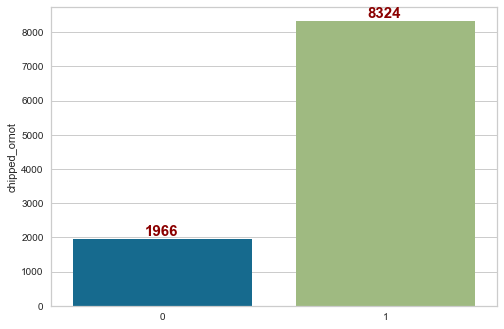

In [46]:
hoho = sns.barplot(x=chipped_ornot.value_counts().index, y=chipped_ornot.value_counts())

for bar in hoho.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.5, height+0.005,
                '%d' % int(height),
                ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)

#### 3) <font color='dark green'> istrial </font> -> Drop

In [47]:
adoption.istrial.value_counts() # all 0s -> DROP

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0    10289
Name: istrial, dtype: int64

#### 4) <font color='dark green'> returndate </font> -> Drop

##### already incorporated in label: 
- No need to put it as a separate label again since only returns on adoption are my concern.

#### <font color='dark green'> deceaseddate </font> -> Drop

In [48]:
dead_or_alive = adoption.deceaseddate.rename("dead_or_alive") 
dead_or_alive[adoption.deceaseddate.notna()] = 0
dead_or_alive[adoption.deceaseddate.isna()] = 1
dead_or_alive.value_counts()

1    9964
0     326
Name: dead_or_alive, dtype: int64

<IPython.core.display.Javascript object>

Text(0.5, 0.5, 'Dead or Alive')

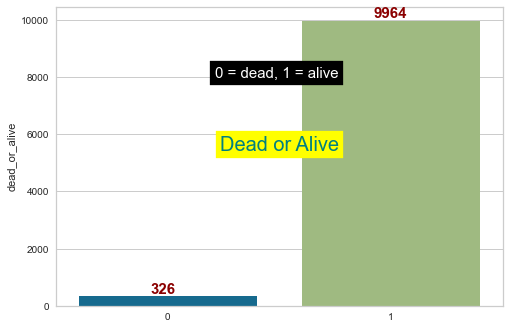

In [49]:
hoho = sns.barplot(x=dead_or_alive.value_counts().index, y=dead_or_alive.value_counts())

for bar in hoho.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.5, height+0.005,
                '%d' % int(height),
                ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)
plt.text(x=0.21, y=8000,s="0 = dead, 1 = alive",c="White",backgroundcolor="black",size = 15)
plt.title("Dead or Alive",size =20, c="teal",x=0.5,y=0.5,backgroundcolor="yellow")

## adding my dataframes/series into my adoption df --> *** <font color='red'> use adoption1


In [50]:
adoption1 = pd.concat([adoption,chipped_ornot,dead_or_alive],axis=1)
adoption1.drop(columns=["identichipnumber","istrial","returndate","deceaseddate"],inplace= True)
adoption1.head(3)

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,movementtype,returnedreason,deceasedreason,diedoffshelter,puttosleep,isdoa,label,intake_reason_stray_or_not,chipped_ornot,dead_or_alive
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,Jadzia,Domestic Short Hair,Tortie,Cat,9 years 2 months.,...,Adoption,Stray,Died in care,0,0,0,1,0,1,1
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,Gonzo,German Shepherd Dog/Mix,Tan,Dog,9 years 1 month.,...,Adoption,Stray,Died in care,0,0,0,1,0,1,1
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,Maggie,Shep Mix/Siberian Husky,Various,Dog,6 years 8 months.,...,Adoption,Stray,Died in care,0,0,0,1,0,1,1


## __Feature cleaning__

### looking for features that have yet to be encoded AKA strings
####  dtype =='O' is locating for strings

In [51]:
categorical_features = [features for features in adoption1 if adoption1[features].dtypes=='O'] 
categorical_features

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['intakedate',
 'intakereason',
 'sheltercode',
 'animalname',
 'breedname',
 'basecolour',
 'speciesname',
 'animalage',
 'sexname',
 'location',
 'movementdate',
 'movementtype',
 'returnedreason',
 'deceasedreason',
 'intake_reason_stray_or_not',
 'chipped_ornot',
 'dead_or_alive']

In [52]:
adoption1[categorical_features].head(3)

,intakedate,intakereason,sheltercode,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,returnedreason,deceasedreason,intake_reason_stray_or_not,chipped_ornot,dead_or_alive
0,2009-11-28 00:00:00,Moving,C09115463,Jadzia,Domestic Short Hair,Tortie,Cat,9 years 2 months.,Female,Adoptable Cat Glass Colony,2017-05-13 00:00:00,Adoption,Stray,Died in care,0,1,1
1,2009-12-08 00:00:00,Moving,D09125594,Gonzo,German Shepherd Dog/Mix,Tan,Dog,9 years 1 month.,Male,Adoptable Dogs,2017-04-24 00:00:00,Adoption,Stray,Died in care,0,1,1
2,2012-08-10 00:00:00,Abandoned,D12082309,Maggie,Shep Mix/Siberian Husky,Various,Dog,6 years 8 months.,Female,Adoptable Dogs,2017-04-15 00:00:00,Adoption,Stray,Died in care,0,1,1


### 'speciesname','ID','location','sheltercode',
### 'animalname','breedname','basecolour',
### 'animalage','sexname','movementdate', 'intakedate',
### 'movementtype','returnedreason','deceaseddate','deceasedreason'

###  1) <font color = "teal" > speciesname </font> -> Reduce
- Animal Species name

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(6, 4550, '.')

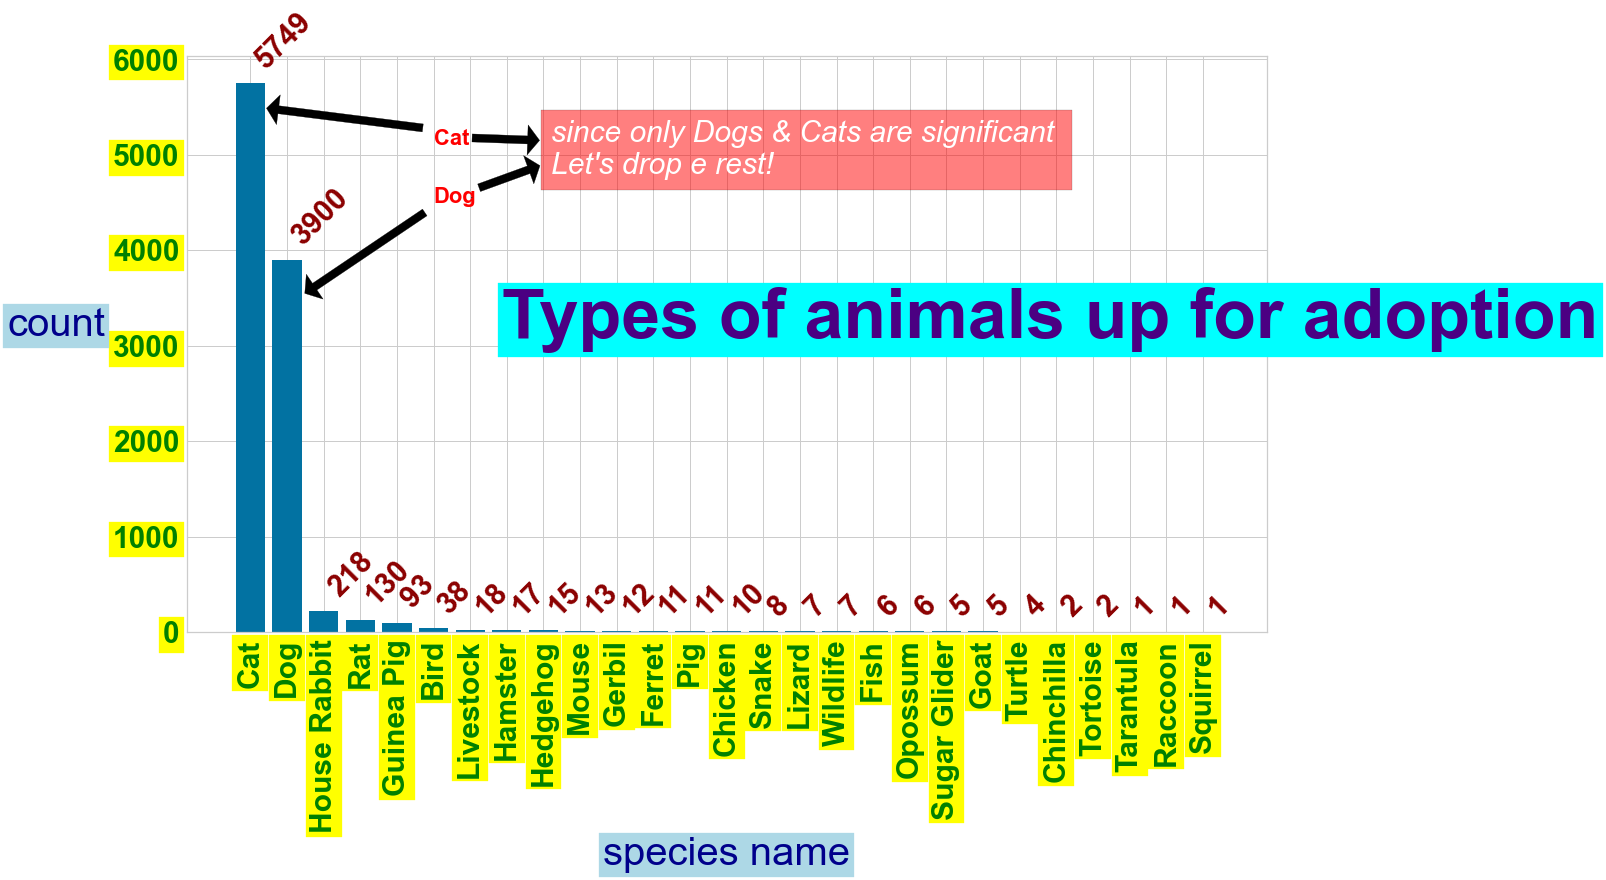

In [53]:
# y = sns.countplot(data=adoption, x="speciesname")
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1]) 
x= adoption1.speciesname.value_counts().index
y= adoption1.speciesname.value_counts()

def label_top_of_bars(bars):
#     Attach a text label above each bar displaying its height
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height+100,
                '%d' % int(height),
                ha='left', va='bottom',c = "darkred",size = 30,weight ="demi",rotation = 45)
bar = ax.bar(x,y)
label_top_of_bars(bar)
plt.ylabel(ylabel = "count", size = 40, c="darkblue",backgroundcolor = "lightblue",rotation =360,labelpad=57.0)
plt.xlabel(xlabel = "species name", size = 40, c="darkblue",backgroundcolor = "lightblue")
plt.xticks(size = 30,c ="green",weight='demi',rotation = 90,backgroundcolor = "yellow") 
plt.yticks(size = 30,c ="green",weight='demi',rotation = 0,backgroundcolor = "yellow")
plt.title("Types of animals up for adoption", size = 70,weight='extra bold',c = "indigo",x=0.8, y=0.5,backgroundcolor="cyan")

ax.text(8.2, 4800, "since only Dogs & Cats are significant \n"+"\n".join(["Let's drop e rest!"]), style='italic',c="White",
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10},size=30)
ax.annotate('Cat',c="red",weight='extra bold', size = 22, xy=(0.2, 5500), xytext=(5, 5100),
            arrowprops=dict(facecolor='black', shrink=0.05,width =8,headwidth=30))
ax.annotate('Dog',c="red",weight='extra bold', size = 22, xy=(1.3, 3500), xytext=(5, 4500),
            arrowprops=dict(facecolor='black', shrink=0.05,width =8,headwidth=30))
ax.annotate('.', xy=(8, 5150), xytext=(5.8, 5200),
            arrowprops=dict(facecolor='black', shrink=0.05,width =8,headwidth=30))
ax.annotate('.', xy=(8, 4900), xytext=(6, 4550),
            arrowprops=dict(facecolor='black', shrink=0.05,width =8,headwidth=30))

In [54]:
adoption_cat_n_dog_only = adoption1[(adoption1.speciesname == "Cat") | (adoption1.speciesname == "Dog")]
print('Data has shortened from',len(adoption1), "to", len(adoption_cat_n_dog_only),"rows.")

adoption_cat_n_dog_only.reset_index().drop(columns="index")
adoption_cat_n_dog_only.speciesname.value_counts()

Data has shortened from 10290 to 9649 rows.


Cat    5749
Dog    3900
Name: speciesname, dtype: int64

In [55]:
cats_n_dog = pd.Series(1,           index = adoption_cat_n_dog_only.index).rename("cats_n_dog")
cats_n_dog[adoption_cat_n_dog_only.speciesname == "Cat"] = 0
print(color.BOLD+"Revised column:")
cats_n_dog.value_counts()

Revised column:


0    5749
1    3900
Name: cats_n_dog, dtype: int64

<IPython.core.display.Javascript object>

Text(0.5, 0.5, '0 is cat 1 is dog')

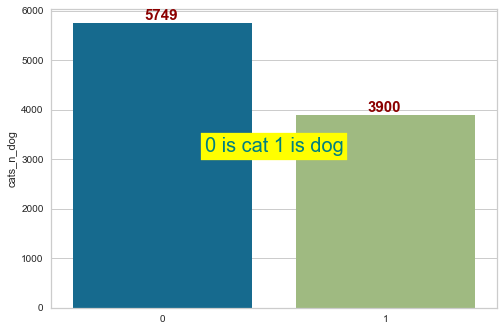

In [56]:
hoho = sns.barplot(x=cats_n_dog.value_counts().index, y=cats_n_dog.value_counts())

for bar in hoho.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.5, height+0.005,
                '%d' % int(height),
                ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)
plt.title("0 is cat 1 is dog",size =20, c="teal",x=0.5,y=0.5,backgroundcolor="yellow")

In [57]:
print(len(adoption_cat_n_dog_only), len(cats_n_dog))
adoption_cat_n_dog_only = pd.concat([adoption_cat_n_dog_only,cats_n_dog],axis =1)
adoption_cat_n_dog_only.head(3)

9649 9649


C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,returnedreason,deceasedreason,diedoffshelter,puttosleep,isdoa,label,intake_reason_stray_or_not,chipped_ornot,dead_or_alive,cats_n_dog
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,Jadzia,Domestic Short Hair,Tortie,Cat,9 years 2 months.,...,Stray,Died in care,0,0,0,1,0,1,1,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,Gonzo,German Shepherd Dog/Mix,Tan,Dog,9 years 1 month.,...,Stray,Died in care,0,0,0,1,0,1,1,1
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,Maggie,Shep Mix/Siberian Husky,Various,Dog,6 years 8 months.,...,Stray,Died in care,0,0,0,1,0,1,1,1


### Data has shortened from 10290 to 9649 rows: use <font color=blue|red|yellow> adoption_cat_n_dog_only </font> 

## 2) <font color = "teal" > id </font>-> Drop
- ID of animal

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.2, 0.5, 'repeated IDs')

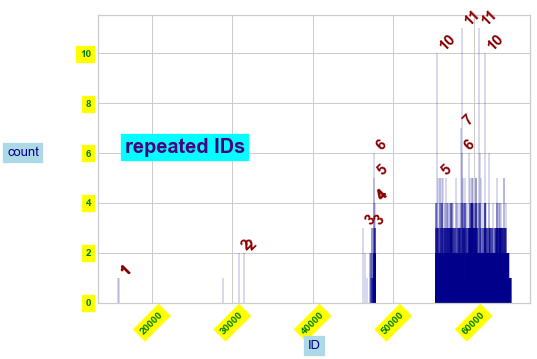

In [58]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1]) 
x= adoption_cat_n_dog_only.id.value_counts().sort_index().reset_index()["index"]
y= adoption_cat_n_dog_only.id.value_counts().sort_index()
blank = []
def label_top_of_bars(bars):
#     Attach a text label above each bar displaying its height
    for bar in bars:
        height = bar.get_height()
        blank.append(height)
        if len(pd.Series(blank, dtype = int)[pd.Series(blank, dtype = int).isin([height])]) <3 :
            ax.text(bar.get_x() + bar.get_width()/2., height+0.005,
                    '%d' % int(height),
                    ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 45)
bar = ax.bar(x,y,ec="darkblue")
label_top_of_bars(bar)
plt.ylabel(ylabel = "count", size = 13, c="darkblue",backgroundcolor = "lightblue",rotation =360,labelpad=57.0)
plt.xlabel(xlabel = "ID", size = 13, c="darkblue",backgroundcolor = "lightblue")
plt.xticks(size = 10,c ="green",weight='demi',rotation = 45,backgroundcolor = "yellow") 
plt.yticks(size = 10,c ="green",weight='demi',rotation = 0,backgroundcolor = "yellow")
plt.title("repeated IDs", size = 20,weight='extra bold',c = "indigo",x=0.2, y=0.5,backgroundcolor="cyan")

Text(0.5, 0.7, 'Repeated ID counts')

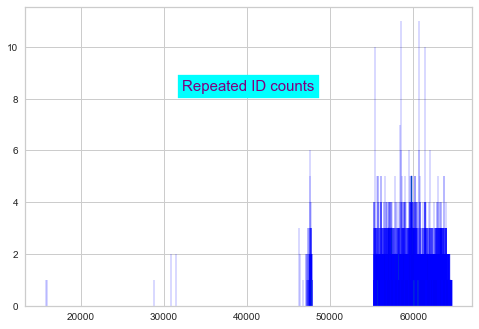

In [59]:
plt.bar(adoption_cat_n_dog_only.id.value_counts().index,adoption_cat_n_dog_only.id.value_counts(), ec='blue')
plt.title("Repeated ID counts", c="purple",size = 15,x=0.5,y=0.7,backgroundcolor="cyan")

In [60]:
repeats    = adoption_cat_n_dog_only.id.value_counts()[adoption_cat_n_dog_only.id.value_counts()  > 1]
no_repeats = adoption_cat_n_dog_only.id.value_counts()[adoption_cat_n_dog_only.id.value_counts() == 1]
adoption_cat_n_dog_only.id.value_counts().value_counts()

1     4555
2     1649
3      400
4      103
5       21
6        5
11       2
10       2
7        1
Name: id, dtype: int64

### Looking for repeated IDs via adoption_cat_n_dog_only.id

In [61]:
print("Fostered",len(adoption_cat_n_dog_only[adoption_cat_n_dog_only.id ==60702]\
                     [adoption_cat_n_dog_only.movementtype =="Foster"]),"times.")
adoption_cat_n_dog_only[["id","intakedate","movementtype","label"]]\
[adoption_cat_n_dog_only.id ==60702]

Fostered 10 times.


<ipython-input-61-cde583c5008b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Fostered",len(adoption_cat_n_dog_only[adoption_cat_n_dog_only.id ==60702]\


,id,intakedate,movementtype,label
6223,60702,2018-08-24 08:18:50,Foster,-1
6224,60702,2018-08-24 08:18:50,Foster,-1
6225,60702,2018-08-24 08:18:50,Foster,-1
6226,60702,2018-08-24 08:18:50,Foster,-1
6227,60702,2018-08-24 08:18:50,Foster,-1
6228,60702,2018-08-24 08:18:50,Foster,-1
6229,60702,2018-08-24 08:18:50,Foster,-1
6230,60702,2018-08-24 08:18:50,Foster,-1
6231,60702,2018-08-24 08:18:50,Foster,-1
6232,60702,2018-08-24 08:18:50,Foster,-1


In [62]:
print("Fostered",len(adoption_cat_n_dog_only[adoption_cat_n_dog_only.id ==58410]\
                     [adoption_cat_n_dog_only.movementtype =="Foster"]),"times.")
print("Adopted ",len(adoption_cat_n_dog_only[adoption_cat_n_dog_only.id ==58410]\
                     [adoption_cat_n_dog_only.movementtype =="Adoption"]),"times.")
adoption_cat_n_dog_only[["id","intakedate","movementtype","label","returnedreason"]]\
[adoption_cat_n_dog_only.id ==58410] 


Fostered 3 times.
Adopted  4 times.


C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-62-a2c1a0dea412>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Fostered",len(adoption_cat_n_dog_only[adoption_cat_n_dog_only.id ==58410]\
<ipython-input-62-a2c1a0dea412>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Adopted ",len(adoption_cat_n_dog_only[adoption_cat_n_dog_only.id ==58410]\


,id,intakedate,movementtype,label,returnedreason
3607,58410,2017-12-29 13:59:38,Foster,-1,Stray
3608,58410,2017-12-29 13:59:38,Adoption,0,Incompatible with owner lifestyle
3609,58410,2017-12-29 13:59:38,Adoption,0,Incompatible with owner lifestyle
3610,58410,2017-12-29 13:59:38,Foster,-1,Stray
3611,58410,2017-12-29 13:59:38,Adoption,0,Transfer from Other Shelter
3612,58410,2017-12-29 13:59:38,Foster,-1,Stray
3613,58410,2017-12-29 13:59:38,Adoption,1,Stray


#### lets aggregate them together into a new column for no. of times fostered and no. of times adopted (AKA returned)

In [63]:
%%time
c = []

for j in range(0,len(adoption_cat_n_dog_only)):
    a = len(adoption_cat_n_dog_only\
                [adoption_cat_n_dog_only.id == adoption_cat_n_dog_only.id.iloc[j]]\
                [adoption_cat_n_dog_only.movementtype == "Foster"])
    c.append(a)      

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<timed exec>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Wall time: 14.6 s


In [64]:
adoption_cat_n_dog_only["No. of times Fostered"] = pd.Series(c,           index = adoption_cat_n_dog_only.index)
adoption_cat_n_dog_only["No. of times Fostered"].value_counts()

0     5398
1     2958
2      958
3      262
4       35
10      11
8       11
7       10
5        6
Name: No. of times Fostered, dtype: int64

In [65]:
adoption_cat_n_dog_only[["id","intakedate","movementtype","label","No. of times Fostered"]]\
[adoption_cat_n_dog_only.id ==60702]

,id,intakedate,movementtype,label,No. of times Fostered
6223,60702,2018-08-24 08:18:50,Foster,-1,10
6224,60702,2018-08-24 08:18:50,Foster,-1,10
6225,60702,2018-08-24 08:18:50,Foster,-1,10
6226,60702,2018-08-24 08:18:50,Foster,-1,10
6227,60702,2018-08-24 08:18:50,Foster,-1,10
6228,60702,2018-08-24 08:18:50,Foster,-1,10
6229,60702,2018-08-24 08:18:50,Foster,-1,10
6230,60702,2018-08-24 08:18:50,Foster,-1,10
6231,60702,2018-08-24 08:18:50,Foster,-1,10
6232,60702,2018-08-24 08:18:50,Foster,-1,10


In [66]:
adoption_cat_n_dog_only[["id","intakedate","movementtype","label","No. of times Fostered"]]\
[adoption_cat_n_dog_only.id ==58410]

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,intakedate,movementtype,label,No. of times Fostered
3607,58410,2017-12-29 13:59:38,Foster,-1,3
3608,58410,2017-12-29 13:59:38,Adoption,0,3
3609,58410,2017-12-29 13:59:38,Adoption,0,3
3610,58410,2017-12-29 13:59:38,Foster,-1,3
3611,58410,2017-12-29 13:59:38,Adoption,0,3
3612,58410,2017-12-29 13:59:38,Foster,-1,3
3613,58410,2017-12-29 13:59:38,Adoption,1,3


In [67]:
ids_withonly_1count = adoption_cat_n_dog_only.id.value_counts()[adoption_cat_n_dog_only.id.value_counts()==1].index.to_list()

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
ids_with_1count = adoption_cat_n_dog_only.id.value_counts()[adoption_cat_n_dog_only.id.value_counts()==1].index.to_list()
verylong = adoption_cat_n_dog_only[adoption_cat_n_dog_only.id.isin(ids_with_1count)][adoption_cat_n_dog_only["movementtype"]=="Foster"]

print("IDs with one count and only consists of 'Foster' is",len(verylong))

IDs with one count and only consists of 'Foster' is 271


<ipython-input-68-77e717546e26>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  verylong = adoption_cat_n_dog_only[adoption_cat_n_dog_only.id.isin(ids_with_1count)][adoption_cat_n_dog_only["movementtype"]=="Foster"]


#### IDs with one count and only consists of 'Foster' is 271

In [69]:
ids_more_1count = adoption_cat_n_dog_only.id.value_counts()[adoption_cat_n_dog_only.id.value_counts()>1].index.to_list()

print("Original length",\
      len(adoption_cat_n_dog_only),'\n', \
      "Altered length",
      len(adoption_cat_n_dog_only[adoption_cat_n_dog_only.id.isin(ids_with_1count)])+\
      len(adoption_cat_n_dog_only[adoption_cat_n_dog_only.id.isin(ids_more_1count)]))

Original length 9649 
 Altered length 9649


In [70]:
vlong = adoption_cat_n_dog_only.id[adoption_cat_n_dog_only.id.isin(ids_more_1count)][adoption_cat_n_dog_only["movementtype"]=="Foster"]
print("we want to drop", len(vlong), "rows", )
vlong
adoption_cat_n_dog_only.loc[vlong.index]

we want to drop 2180 rows


,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,deceasedreason,diedoffshelter,puttosleep,isdoa,label,intake_reason_stray_or_not,chipped_ornot,dead_or_alive,cats_n_dog,No. of times Fostered
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8 years 11 months.,...,Died in care,0,0,0,-1,0,1,1,0,1
9,46238,2016-10-09 00:00:00,Abandoned,0,D16103207,Tennessee,Heeler/Mix,Brown and Black,Dog,3 years 2 months.,...,Died in care,0,0,0,-1,0,1,1,1,2
10,46238,2016-10-09 00:00:00,Abandoned,0,D16103207,Tennessee,Heeler/Mix,Brown and Black,Dog,3 years 2 months.,...,Died in care,0,0,0,-1,0,1,1,1,2
12,46437,2016-10-26 00:00:00,Abandoned,0,C16103406,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,...,"UU - untreatable, unmanageable",0,1,0,-1,0,1,0,0,1
15,47120,2017-01-11 00:00:00,Abandoned,0,C17011137,Vivian,Himalayan,Seal,Cat,5 years 0 months.,...,Died in care,0,0,0,-1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10126,64294,2019-08-06 12:42:30,Unable to Afford,0,C19081255,Naomi,Domestic Short Hair,Torbie,Cat,11 weeks.,...,Court Order/ Legal,0,0,0,-1,0,1,1,0,1
10132,64298,2019-08-06 16:23:51,Incompatible with owner lifestyle,0,C19081256,Lily Sophia,Domestic Short Hair,Brown and Black,Cat,18 weeks.,...,Court Order/ Legal,0,0,0,-1,0,1,1,0,1
10141,64308,2019-08-07 15:51:38,Transfer from Other Shelter,0,D19081263,Salem,Australian Shepherd,Tan and White,Dog,12 years 8 months.,...,Court Order/ Legal,0,0,0,-1,0,1,1,1,1
10166,64336,2019-08-09 13:40:20,Stray,0,C19081273,Magpie,Domestic Short Hair,Black and White,Cat,14 weeks.,...,Court Order/ Legal,0,0,0,-1,1,0,1,0,2


In [71]:
duplicates = adoption_cat_n_dog_only.loc[vlong.index]

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
duplicates.to_csv(\
            path_or_buf ="C:/Users/hi/Desktop/DATA SCIENCE/05 Data science fundamentals module 05/CAPSTONE/versions/duplicateds.csv")

In [73]:
adoption_cat_n_dog_only_v2 = adoption_cat_n_dog_only.drop(vlong.index,inplace = False)

print("Length of data further drops from",len(adoption_cat_n_dog_only),"to",len(adoption_cat_n_dog_only_v2),": \n"\
      +"Original length",\
      len(adoption_cat_n_dog_only),'\n',\
      "Altered length",
      len(adoption_cat_n_dog_only_v2),'\n'+\
     "     dropped by",len(adoption_cat_n_dog_only) - len(adoption_cat_n_dog_only_v2),"!")

Length of data further drops from 9649 to 7469 : 
Original length 9649 
 Altered length 7469 
     dropped by 2180 !


C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
ids_with_1count = adoption_cat_n_dog_only_v2.id.value_counts()[adoption_cat_n_dog_only_v2.id.value_counts()==1].index.to_list()
verylong = adoption_cat_n_dog_only_v2[adoption_cat_n_dog_only_v2.id.isin(ids_with_1count)][adoption_cat_n_dog_only_v2["movementtype"]=="Foster"]

print("V2 IDs with one count and only consists of 'Foster' is",len(verylong))
adoption_cat_n_dog_only_v2 = adoption_cat_n_dog_only_v2.reset_index().drop(columns="index")
adoption_cat_n_dog_only_v2

V2 IDs with one count and only consists of 'Foster' is 271


<ipython-input-74-bedddd2a479b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  verylong = adoption_cat_n_dog_only_v2[adoption_cat_n_dog_only_v2.id.isin(ids_with_1count)][adoption_cat_n_dog_only_v2["movementtype"]=="Foster"]


,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,deceasedreason,diedoffshelter,puttosleep,isdoa,label,intake_reason_stray_or_not,chipped_ornot,dead_or_alive,cats_n_dog,No. of times Fostered
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,Jadzia,Domestic Short Hair,Tortie,Cat,9 years 2 months.,...,Died in care,0,0,0,1,0,1,1,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,Gonzo,German Shepherd Dog/Mix,Tan,Dog,9 years 1 month.,...,Died in care,0,0,0,1,0,1,1,1,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,Maggie,Shep Mix/Siberian Husky,Various,Dog,6 years 8 months.,...,Died in care,0,0,0,1,0,1,1,1,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8 years 11 months.,...,Died in care,0,0,0,1,0,1,1,0,1
4,31469,2013-03-26 00:00:00,Incompatible with owner lifestyle,0,D1303720,Bonnie,Basenji/Mix,Brown and White,Dog,5 years 11 months.,...,Died in care,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,Max,Domestic Medium Hair,Orange and White,Cat,21 weeks.,...,Court Order/ Legal,0,0,0,1,0,1,1,0,0
7465,64588,2019-08-27 18:14:11,Stray,0,C19081418,Punkin,Domestic Short Hair,Calico,Cat,6 weeks.,...,Court Order/ Legal,0,0,0,-1,1,1,1,0,1
7466,64606,2019-08-29 12:10:21,Stray,0,D19081440,Dozer,Coonhound,Red,Dog,6 years 8 months.,...,Court Order/ Legal,0,0,0,-1,1,1,1,1,0
7467,64608,2019-08-29 18:58:06,Stray,0,D19081421,Lucy Farmer,Beagle,Tricolour,Dog,7 years 5 months.,...,Court Order/ Legal,0,0,0,-1,1,1,1,1,0


C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.2, 0.5, 'No. of times fostered')

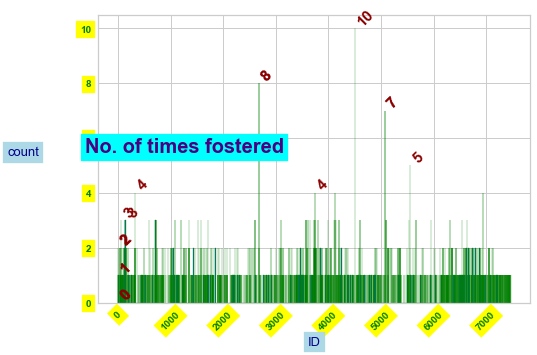

In [75]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1]) 
x= adoption_cat_n_dog_only_v2["No. of times Fostered"].index
y= adoption_cat_n_dog_only_v2["No. of times Fostered"]
blank = []
def label_top_of_bars(bars):
#     Attach a text label above each bar displaying its height
    for bar in bars:
        height = bar.get_height()
        blank.append(height)
        if len(pd.Series(blank, dtype = int)[pd.Series(blank, dtype = int).isin([height])]) <3 :
            ax.text(bar.get_x() + bar.get_width()/2., height+0.005,
                    '%d' % int(height),
                    ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 45)
bar = ax.bar(x,y,ec="green")
label_top_of_bars(bar)
plt.ylabel(ylabel = "count", size = 13, c="darkblue",backgroundcolor = "lightblue",rotation =360,labelpad=57.0)
plt.xlabel(xlabel = "ID", size = 13, c="darkblue",backgroundcolor = "lightblue")
plt.xticks(size = 10,c ="green",weight='demi',rotation = 45,backgroundcolor = "yellow") 
plt.yticks(size = 10,c ="green",weight='demi',rotation = 0,backgroundcolor = "yellow")
plt.title("No. of times fostered", size = 20,weight='extra bold',c = "indigo",x=0.2, y=0.5,backgroundcolor="cyan")

### Use <font color='red'> adoption_cat_n_dog_only_v2 </font> now:
- since we dropped the duplicates with foster and created another column with no. of times fostered

### using ID 58410 as an example of the b4 and after

In [76]:
adoption_cat_n_dog_only[["id","intakedate","movementtype","label","No. of times Fostered"]]\
[adoption_cat_n_dog_only.id ==58410]

,id,intakedate,movementtype,label,No. of times Fostered
3607,58410,2017-12-29 13:59:38,Foster,-1,3
3608,58410,2017-12-29 13:59:38,Adoption,0,3
3609,58410,2017-12-29 13:59:38,Adoption,0,3
3610,58410,2017-12-29 13:59:38,Foster,-1,3
3611,58410,2017-12-29 13:59:38,Adoption,0,3
3612,58410,2017-12-29 13:59:38,Foster,-1,3
3613,58410,2017-12-29 13:59:38,Adoption,1,3


In [77]:
adoption_cat_n_dog_only_v2[["id","intakedate","movementtype","label","No. of times Fostered"]]\
[adoption_cat_n_dog_only_v2.id ==58410]

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,intakedate,movementtype,label,No. of times Fostered
2603,58410,2017-12-29 13:59:38,Adoption,0,3
2604,58410,2017-12-29 13:59:38,Adoption,0,3
2605,58410,2017-12-29 13:59:38,Adoption,0,3
2606,58410,2017-12-29 13:59:38,Adoption,1,3


### using ID 60702 as an example of the b4 and after

In [78]:
adoption_cat_n_dog_only[["id","intakedate","movementtype","label","No. of times Fostered"]]\
[adoption_cat_n_dog_only.id ==60702]

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,intakedate,movementtype,label,No. of times Fostered
6223,60702,2018-08-24 08:18:50,Foster,-1,10
6224,60702,2018-08-24 08:18:50,Foster,-1,10
6225,60702,2018-08-24 08:18:50,Foster,-1,10
6226,60702,2018-08-24 08:18:50,Foster,-1,10
6227,60702,2018-08-24 08:18:50,Foster,-1,10
6228,60702,2018-08-24 08:18:50,Foster,-1,10
6229,60702,2018-08-24 08:18:50,Foster,-1,10
6230,60702,2018-08-24 08:18:50,Foster,-1,10
6231,60702,2018-08-24 08:18:50,Foster,-1,10
6232,60702,2018-08-24 08:18:50,Foster,-1,10


In [79]:
adoption_cat_n_dog_only_v2[["id","intakedate","movementtype","label","No. of times Fostered"]]\
[adoption_cat_n_dog_only_v2.id ==60702]

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,intakedate,movementtype,label,No. of times Fostered
4505,60702,2018-08-24 08:18:50,Adoption,1,10


### Looking at the graph again there are still repeated IDs

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0.7, 'Repeated ID counts')

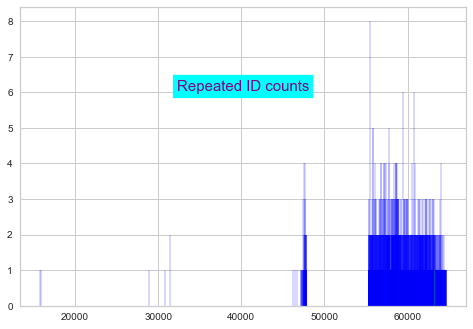

In [80]:
plt.bar(adoption_cat_n_dog_only_v2.id.value_counts().index,
        adoption_cat_n_dog_only_v2.id.value_counts(), ec='blue')
plt.title("Repeated ID counts", c="purple",size = 15,x=0.5,y=0.7,backgroundcolor="cyan")

In [81]:
adoption_cat_n_dog_only_v2[["id","intakedate","intakereason","movementtype","label","No. of times Fostered","movementdate","returnedreason"]]\
[adoption_cat_n_dog_only_v2.id ==55456]

,id,intakedate,intakereason,movementtype,label,No. of times Fostered,movementdate,returnedreason
5364,55456,2018-11-27 17:30:00,Owner Deceased,Adoption,0,2,2017-04-20 00:00:00,Incompatible with owner lifestyle
5365,55456,2018-11-27 17:30:00,Owner Deceased,Adoption,0,2,2017-05-12 00:00:00,Owner Deceased
5366,55456,2018-11-27 17:30:00,Owner Deceased,Adoption,0,2,2018-12-13 00:00:00,Return Adopt - Behavior
5367,55456,2018-11-27 17:30:00,Owner Deceased,Adoption,0,2,2019-03-15 00:00:00,Return adopt - lifestyle issue
5368,55456,2018-11-27 17:30:00,Owner Deceased,Adoption,0,2,2019-04-16 00:00:00,Stray
5369,55456,2018-11-27 17:30:00,Owner Deceased,Reclaimed,-1,2,2019-04-17 00:00:00,Stray
5370,55456,2018-11-27 17:30:00,Owner Deceased,Reclaimed,-1,2,2019-04-30 00:00:00,Return Adopt - Behavior
5371,55456,2018-11-27 17:30:00,Owner Deceased,Adoption,1,2,2019-06-06 00:00:00,Stray


In [82]:
adoption_cat_n_dog_only_v2[["id","intakedate","intakereason","movementtype","label","No. of times Fostered","movementdate","returnedreason"]]\
[adoption_cat_n_dog_only_v2.id ==55781]

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,intakedate,intakereason,movementtype,label,No. of times Fostered,movementdate,returnedreason
484,55781,2017-05-11 13:42:12,Stray,Reclaimed,-1,0,2017-05-11 00:00:00,Stray
485,55781,2017-05-11 13:42:12,Stray,Reclaimed,-1,0,2017-05-19 00:00:00,Stray
486,55781,2017-05-11 13:42:12,Stray,Reclaimed,-1,0,2019-07-01 00:00:00,Incompatible with owner lifestyle
487,55781,2017-05-11 13:42:12,Stray,Adoption,0,0,2019-07-06 00:00:00,Return Adopt - Behavior
488,55781,2017-05-11 13:42:12,Stray,Transfer,-1,0,2019-07-30 00:00:00,Stray


### it looks like the reclamation reasons is usually stray

In [83]:
adoption_cat_n_dog_only_v2.returnedreason[adoption_cat_n_dog_only_v2.movementtype=="Reclaimed"].value_counts()

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Stray                                1261
Incompatible with owner lifestyle      48
Unsuitable Accommodation               17
Biting                                 13
Unable to Afford                        9
Owner requested Euthanasia              9
Moving                                  8
Landlord issues                         6
Owner Deceased                          5
Police Assist                           4
Rabies Monitoring                       3
Abandoned                               3
Return Adopt - Behavior                 2
Sick/Injured                            2
DOA                                     2
Marriage/Relationship split             1
Abuse/ neglect                          1
Allergies                               1
Incompatible with other pets            1
Name: returnedreason, dtype: int64

In [84]:
adoption_cat_n_dog_only_v2[["id","intakedate","intakereason","movementtype","label","No. of times Fostered","movementdate","returnedreason"]]\
[adoption_cat_n_dog_only_v2.movementtype=="Reclaimed"]\
[adoption_cat_n_dog_only_v2.id.isin(adoption_cat_n_dog_only_v2.id.value_counts()[adoption_cat_n_dog_only_v2.id.value_counts()>1].index.to_list())]

<ipython-input-84-c9f30b298528>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  adoption_cat_n_dog_only_v2[["id","intakedate","intakereason","movementtype","label","No. of times Fostered","movementdate","returnedreason"]]\


,id,intakedate,intakereason,movementtype,label,No. of times Fostered,movementdate,returnedreason
20,47414,2017-02-16 00:00:00,Abandoned,Reclaimed,-1,0,2017-07-22 00:00:00,Rabies Monitoring
21,47414,2017-02-16 00:00:00,Abandoned,Reclaimed,-1,0,2017-09-02 00:00:00,Stray
45,47613,2017-03-10 00:00:00,Abandoned,Reclaimed,-1,0,2017-09-05 00:00:00,Incompatible with owner lifestyle
102,47712,2017-03-23 00:00:00,Stray,Reclaimed,-1,0,2018-03-30 00:00:00,Stray
172,55351,2017-04-01 13:48:46,Stray,Reclaimed,-1,0,2017-04-03 00:00:00,Incompatible with owner lifestyle
...,...,...,...,...,...,...,...,...
7059,63905,2019-07-09 13:14:23,Stray,Reclaimed,-1,0,2019-07-30 00:00:00,Stray
7060,63905,2019-07-09 13:14:23,Stray,Reclaimed,-1,0,2019-07-31 00:00:00,Stray
7090,63941,2019-07-11 11:04:54,Stray,Reclaimed,-1,0,2019-07-11 00:00:00,Stray
7091,63941,2019-07-11 11:04:54,Stray,Reclaimed,-1,0,2019-07-17 00:00:00,Stray


### Since reclaiming does not necessarily improve the adoption process we shall leave them be

### 3) <font color = "teal" > location </font> -> One Hot & Drop

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0.5, 'location in shelter')

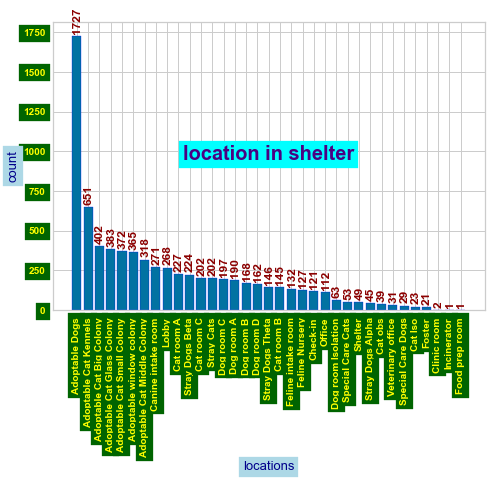

In [85]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1]) 
x= adoption_cat_n_dog_only_v2.location.value_counts().index
y= adoption_cat_n_dog_only_v2.location.value_counts()

def label_top_of_bars(bars):
#     Attach a text label above each bar displaying its height
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x(), height+15,
                '%d' % int(height),
                ha='left', va='bottom',c = "darkred",size = 12,weight ="demi",rotation = 90)
bar = ax.bar(x,y,ec="blue")
label_top_of_bars(bar)

plt.xlabel(xlabel = "locations", size = 13, c="darkblue",backgroundcolor = "lightblue")
plt.ylabel(ylabel = "count"    , size = 13, c="darkblue",backgroundcolor = "lightblue", x=-5)
plt.xticks(size = 10,c ="yellow",weight='demi',rotation = 90,backgroundcolor = "darkgreen") 
plt.yticks(size = 10,c ="yellow",weight='demi',rotation = 0,backgroundcolor = "darkgreen")
plt.title("location in shelter", size = 20,weight='extra bold',c = "indigo",x=0.5, y=0.5,backgroundcolor="cyan")

In [86]:
locations = adoption_cat_n_dog_only_v2.location.copy()
locations[locations.isin(locations.value_counts().index[locations.value_counts()<200].to_list())] = "Other"
locations.value_counts()

Other                          1857
Adoptable Dogs                 1727
Adoptable Cat Kennels           651
Adoptable Cat Big Colony        402
Adoptable Cat Glass Colony      383
Adoptable Cat Small Colony      372
Adoptable window colony         365
Adoptable Cat Middle Colony     318
Canine intake room              271
Lobby                           268
Cat room A                      227
Stray Dogs Beta                 224
Stray Cats                      202
Cat room C                      202
Name: location, dtype: int64

Text(0.5, 0.5, 'location in shelter')

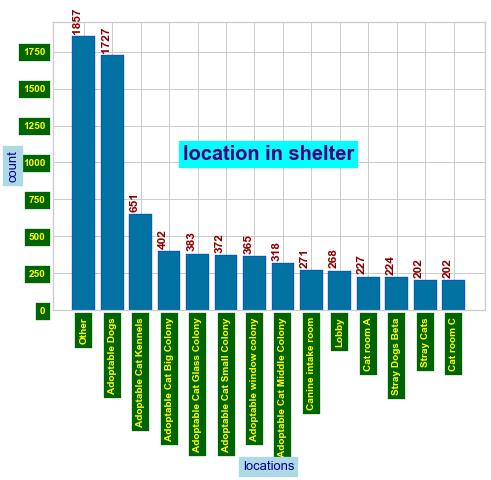

In [87]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1]) 
x= locations.value_counts().index
y= locations.value_counts()

def label_top_of_bars(bars):
#     Attach a text label above each bar displaying its height
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x(), height+15,
                '%d' % int(height),
                ha='left', va='bottom',c = "darkred",size = 12,weight ="demi",rotation = 90)
bar = ax.bar(x,y,ec="blue")
label_top_of_bars(bar)

plt.xlabel(xlabel = "locations", size = 13, c="darkblue",backgroundcolor = "lightblue")
plt.ylabel(ylabel = "count"    , size = 13, c="darkblue",backgroundcolor = "lightblue", x=-5)
plt.xticks(size = 10,c ="yellow",weight='demi',rotation = 90,backgroundcolor = "darkgreen") 
plt.yticks(size = 10,c ="yellow",weight='demi',rotation = 0,backgroundcolor = "darkgreen")
plt.title("location in shelter", size = 20,weight='extra bold',c = "indigo",x=0.5, y=0.5,backgroundcolor="cyan")

#### <font color = "green"> list of locations

In [88]:
locations.value_counts().index
print("List is", len(locations.value_counts().index), "long")

List is 14 long


#### Binary Encoding - mix of hashing + one hot

In [89]:
import category_encoders as ce
# woww = locations
encoder = ce.BinaryEncoder(return_df=True)
locationss = encoder.fit_transform(locations)
# for_viewing = encoder.fit_transform(woww)
# for_viewing.head(3)
locationss.head(3)

C:\Users\hi\anaconda3\lib\site-packages\patsy\constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping


,location_0,location_1,location_2,location_3,location_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0


In [90]:
locationsss = locationss.copy().drop(columns=["location_0"])

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
adoption_cat_n_dog_only_v2 = \
pd.concat([adoption_cat_n_dog_only_v2.drop(columns="location"),locationsss],axis=1)
print(7468, "rows")
adoption_cat_n_dog_only_v2

7468 rows


,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,label,intake_reason_stray_or_not,chipped_ornot,dead_or_alive,cats_n_dog,No. of times Fostered,location_1,location_2,location_3,location_4
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,Jadzia,Domestic Short Hair,Tortie,Cat,9 years 2 months.,...,1,0,1,1,0,0,0,0,0,1
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,Gonzo,German Shepherd Dog/Mix,Tan,Dog,9 years 1 month.,...,1,0,1,1,1,0,0,0,1,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,Maggie,Shep Mix/Siberian Husky,Various,Dog,6 years 8 months.,...,1,0,1,1,1,0,0,0,1,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8 years 11 months.,...,1,0,1,1,0,1,0,0,1,1
4,31469,2013-03-26 00:00:00,Incompatible with owner lifestyle,0,D1303720,Bonnie,Basenji/Mix,Brown and White,Dog,5 years 11 months.,...,0,0,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,Max,Domestic Medium Hair,Orange and White,Cat,21 weeks.,...,1,0,1,1,0,0,1,1,0,0
7465,64588,2019-08-27 18:14:11,Stray,0,C19081418,Punkin,Domestic Short Hair,Calico,Cat,6 weeks.,...,-1,1,1,1,0,1,1,1,0,0
7466,64606,2019-08-29 12:10:21,Stray,0,D19081440,Dozer,Coonhound,Red,Dog,6 years 8 months.,...,-1,1,1,1,1,0,0,1,0,1
7467,64608,2019-08-29 18:58:06,Stray,0,D19081421,Lucy Farmer,Beagle,Tricolour,Dog,7 years 5 months.,...,-1,1,1,1,1,0,1,0,1,1


### visualize the binary encodings

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

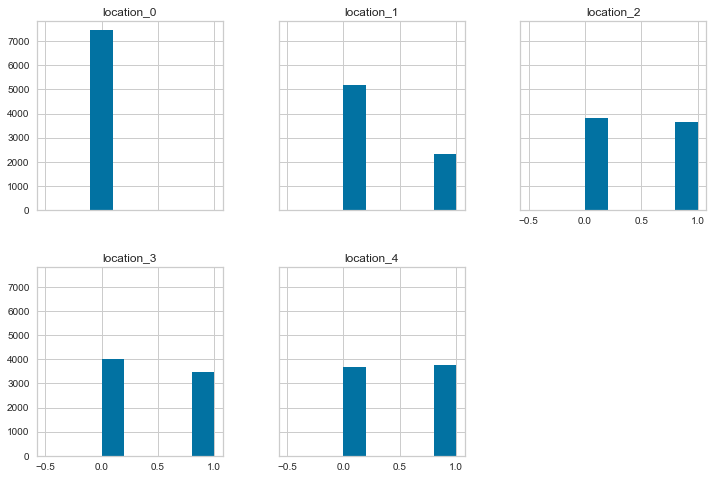

In [92]:
hoho=locationss.hist(layout=(2,3), figsize=(12,8), bins = 5,sharex= True,sharey = True)
plt.xticks(np.arange(0,1.02,1))
plt.show()

### location_0 is all 0s ....

### saving the encoding for after the ML to interpret if able to

In [93]:
locationss['encodings'] = locationss[locationss.columns[:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
locationss

,location_0,location_1,location_2,location_3,location_4,encodings
0,0,0,0,0,1,"0,0,0,0,1"
1,0,0,0,1,0,"0,0,0,1,0"
2,0,0,0,1,0,"0,0,0,1,0"
3,0,0,0,1,1,"0,0,0,1,1"
4,0,0,1,0,0,"0,0,1,0,0"
...,...,...,...,...,...,...
7464,0,1,1,0,0,"0,1,1,0,0"
7465,0,1,1,0,0,"0,1,1,0,0"
7466,0,0,1,0,1,"0,0,1,0,1"
7467,0,1,0,1,1,"0,1,0,1,1"


In [94]:
location_encodings = \
pd.concat([locations,locationss],axis=1).drop_duplicates(keep="first").sort_values('encodings')
location_encodings.to_csv(\
            path_or_buf ="C:/Users/hi/Desktop/DATA SCIENCE/05 Data science fundamentals module 05/CAPSTONE/versions/location_encodings.csv")
location_encodings

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,location,location_0,location_1,location_2,location_3,location_4,encodings
0,Adoptable Cat Glass Colony,0,0,0,0,1,"0,0,0,0,1"
1,Adoptable Dogs,0,0,0,1,0,"0,0,0,1,0"
3,Stray Cats,0,0,0,1,1,"0,0,0,1,1"
4,Stray Dogs Beta,0,0,1,0,0,"0,0,1,0,0"
6,Other,0,0,1,0,1,"0,0,1,0,1"
15,Adoptable Cat Big Colony,0,0,1,1,0,"0,0,1,1,0"
25,Adoptable Cat Small Colony,0,0,1,1,1,"0,0,1,1,1"
28,Adoptable Cat Kennels,0,1,0,0,0,"0,1,0,0,0"
132,Adoptable Cat Middle Colony,0,1,0,0,1,"0,1,0,0,1"
153,Lobby,0,1,0,1,0,"0,1,0,1,0"


### 4) <font color = "teal"> sheltercode </font> -> One hot or drop?

In [95]:
blank = []
for i in adoption_cat_n_dog_only_v2.sheltercode.sort_index():
    blank.append(i.capitalize())
blank_sort = sorted(blank)
short = pd.Series(blank_sort)
# short.value_counts().sort_index()

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.2, 0.9, 'Shelter IDs')

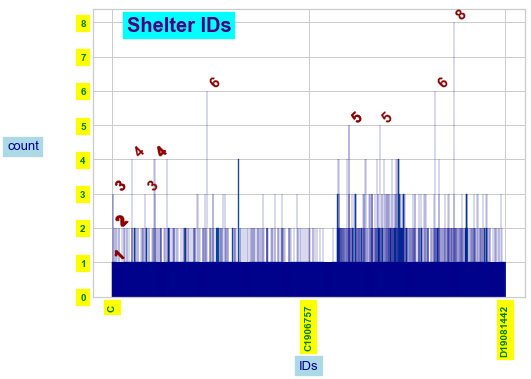

In [96]:
import statistics
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1]) 

x= short.value_counts().sort_index().index
y= short.value_counts().sort_index()
blank = []
def label_top_of_bars(bars):
#     Attach a text label above each bar displaying its height
    for bar in bars:
        height = bar.get_height()
        blank.append(height)
        if len(pd.Series(blank, dtype = int)[pd.Series(blank, dtype = int).isin([height])]) <4 :
            ax.text(bar.get_x() + bar.get_width()/2., height+0.005,
                    '%d' % int(height),
                    ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 45)
bar = ax.bar(x,y,ec="darkblue")
label_top_of_bars(bar)
plt.ylabel(ylabel = "count", size = 13, c="darkblue",backgroundcolor = "lightblue",rotation =360,labelpad=57.0)
plt.xlabel(xlabel = "IDs", size = 13, c="darkblue",backgroundcolor = "lightblue")
plt.xticks([0,
            x.value_counts().sort_index().index.get_loc(str(pd.Series(x).iloc[int(len(x)/2 -1)])), 
            x.value_counts().sort_index().index.get_loc(str(pd.Series(x).iloc[int(len(x) -1)]))]
           ,size = 10,c ="green",weight='demi',rotation = 90,backgroundcolor = "yellow") 
plt.yticks(size = 10,c ="green",weight='demi',rotation = 0,backgroundcolor = "yellow")
plt.title("Shelter IDs", size = 20,weight='extra bold',c = "indigo",x=0.2, y=0.9,backgroundcolor="cyan")

<IPython.core.display.Javascript object>

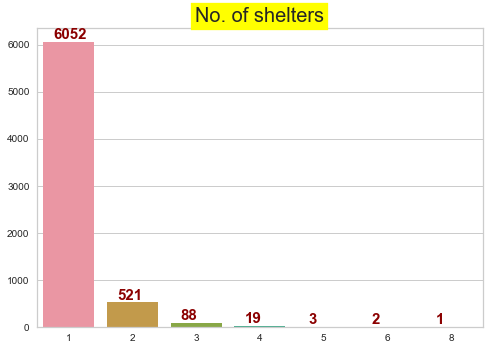

In [97]:
hoho = sns.barplot(x=short.value_counts().sort_index().value_counts().index, 
                   y=short.value_counts().sort_index().value_counts())
plt.title("No. of shelters",size=20,backgroundcolor="yellow",loc = "center")
# plt.text(x=-0.25,y=3.4,s="Length of 1 is \n an anomaly so \n lets remove it",backgroundcolor="Black",c="white")
# plt.annotate(' ',c="red",weight='extra bold', size = 5, xy=(0.1,1.5), xytext=(0.25, 3),
#             arrowprops=dict(facecolor='black', shrink=0.05,width =2,headwidth=8))
for bar in hoho.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/5, height+0.005,
                '%d' % int(height),
                ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)

## Strangely majority of the animals come from unique shelters. 
## Very strange as you would think an animal shelter consists of 100s of animals

In [98]:
blank = []
for i in adoption_cat_n_dog_only_v2.sheltercode.unique():
    blank.append(len(i))

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Checking for errors

<IPython.core.display.Javascript object>

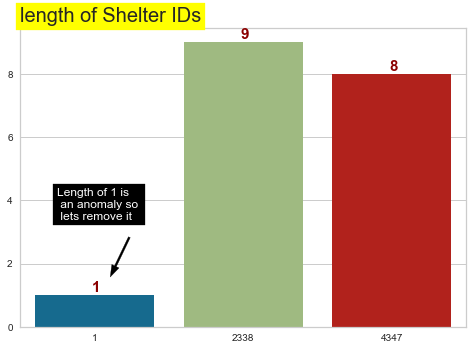

In [99]:
hoho = sns.barplot(x=pd.Series(blank).value_counts(), y=pd.Series(blank).value_counts().index)
plt.title("length of Shelter IDs",size=20,backgroundcolor="yellow",loc = "left")
plt.text(x=-0.25,y=3.4,s="Length of 1 is \n an anomaly so \n lets remove it",backgroundcolor="Black",c="white")
plt.annotate(' ',c="red",weight='extra bold', size = 5, xy=(0.1,1.5), xytext=(0.25, 3),
            arrowprops=dict(facecolor='black', shrink=0.05,width =2,headwidth=8))
for bar in hoho.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.1, height+0.005,
                '%d' % int(height),
                ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)

### This is what it looks like

In [100]:
adoption_cat_n_dog_only_v2[adoption_cat_n_dog_only_v2.sheltercode=="C"]

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,label,intake_reason_stray_or_not,chipped_ornot,dead_or_alive,cats_n_dog,No. of times Fostered,location_1,location_2,location_3,location_4
4842,61110,2018-09-27 08:16:06,Stray,0,C,Frappucino,Husky,Black and grey,Dog,1 year 0 months.,...,-1,1,0,1,1,0,0,1,0,1


### <font color = "red"> ***** since the no. of animals is mostly 1... we cant really tell which shelter is better
    - drop entire column

### 5) <font color="teal"> animalname </font> -> I already have alot of columns ->Drop
- i could possibly convert it to length of name if really need to scrape the bottom for data but since i have enough -> Drop

### 6) <font color = "teal"> breedname </font> -> One hot and drop

### missing data

In [101]:
adoption_cat_n_dog_only_v2.breedname[adoption_cat_n_dog_only_v2.breedname.isna()]

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12    NaN
Name: breedname, dtype: object

### use <font color ="green"> adoption_cat_n_dog_only_v4

In [102]:
adoption_cat_n_dog_only_v4 = adoption_cat_n_dog_only_v2[~adoption_cat_n_dog_only_v2.breedname.isna()]
print("old:" + str(len(adoption_cat_n_dog_only_v2))+"\n"+"New:",len(adoption_cat_n_dog_only_v4))

old:7469
New: 7468


### New feature pure breed or not

In [103]:
from re import search
#searching / in the name
blank =[]
for i in range(0,len(adoption_cat_n_dog_only_v4)):
#     print(adoption_cat_n_dog_only_v4.breedname.iloc[i])
    if search("/",adoption_cat_n_dog_only_v4.breedname.iloc[i]):
        a=1
    else:
        a= 0
    blank.append(a)
len(blank)

7468

In [104]:
pure_breed_or_not= pd.Series(blank).rename("Pure Breed or not")
pure_breed_or_not # to add later

0       0
1       1
2       1
3       0
4       1
       ..
7463    0
7464    0
7465    0
7466    0
7467    0
Name: Pure Breed or not, Length: 7468, dtype: int64

In [105]:
adoption_cat_n_dog_only_v4 = adoption_cat_n_dog_only_v4.reset_index().drop(columns="index")
len(adoption_cat_n_dog_only_v4)

7468

In [106]:
adoption_cat_n_dog_only_v4 = pd.concat([adoption_cat_n_dog_only_v4,pure_breed_or_not],axis=1)
adoption_cat_n_dog_only_v4.head(3)

,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,intake_reason_stray_or_not,chipped_ornot,dead_or_alive,cats_n_dog,No. of times Fostered,location_1,location_2,location_3,location_4,Pure Breed or not
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,Jadzia,Domestic Short Hair,Tortie,Cat,9 years 2 months.,...,0,1,1,0,0,0,0,0,1,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,Gonzo,German Shepherd Dog/Mix,Tan,Dog,9 years 1 month.,...,0,1,1,1,0,0,0,1,0,1
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,Maggie,Shep Mix/Siberian Husky,Various,Dog,6 years 8 months.,...,0,1,1,1,0,0,0,1,0,1


C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

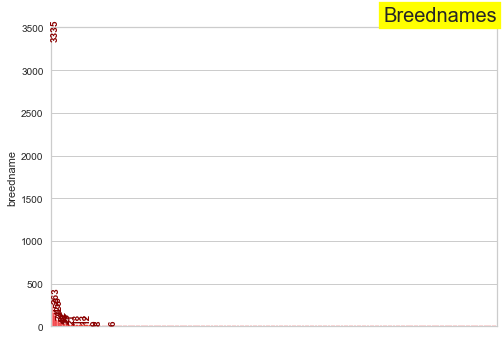

In [107]:
hoho = sns.barplot(x=adoption_cat_n_dog_only_v4.breedname.value_counts().index,
                   y=adoption_cat_n_dog_only_v4.breedname.value_counts(),ec="red")
plt.title("Breednames",size=20,backgroundcolor="yellow",loc = "right")
# plt.text(x=-0.25,y=3.4,s="Length of 1 is \n an anomaly so \n lets remove it",backgroundcolor="Black",c="white")
# plt.annotate(' ',c="red",weight='extra bold', size = 5, xy=(0.1,1.5), xytext=(0.25, 3),
#             arrowprops=dict(facecolor='black', shrink=0.05,width =2,headwidth=8))
plt.xticks([])
blank =[]
for i in range(0,len(hoho.patches)):
    bar = pd.Series(hoho.patches).iloc[i]
    height = bar.get_height()
    blank.append(height)
    if len(pd.Series(blank, dtype = int)[pd.Series(blank, dtype = int).isin([height])]) <2 :
        if (i % 2) == 0:
            plt.text(bar.get_x(), height+8.005,
                        '%d' % int(height),
                        ha='left', va='bottom',c = "darkred",size = 10,weight ="demi",rotation = 90)
#         else: 

### Dropping the outlier to review how the data looks like "zoomed" in

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.4, 0.9, 'Breeds')

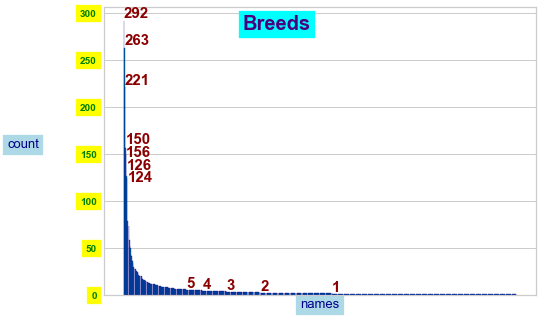

In [108]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1]) 
x= adoption_cat_n_dog_only_v4.breedname.value_counts().drop("Domestic Short Hair").index
y= adoption_cat_n_dog_only_v4.breedname.value_counts().drop("Domestic Short Hair")
blank = []
def label_top_of_bars(bars):
#     Attach a text label above each bar displaying its height
    for bar in bars:
        height = bar.get_height()
        blank.append(height)
        if len(pd.Series(blank, dtype = int)[pd.Series(blank, dtype = int).isin([height])]) <2 :
                if 149< height <155:
                    
                    ax.text(bar.get_x() + bar.get_width(), height+7.95,
                        '%d' % int(height),
                        ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)
                elif 155< height <161:
                    ax.text(bar.get_x() + 2*bar.get_width(), height-12,
                        '%d' % int(height),
                        ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)
                elif  height == 126:
                    
                    ax.text(bar.get_x() + bar.get_width(), height+3.95,
                        '%d' % int(height),
                        ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)
                elif height == 124:
                    ax.text(bar.get_x() + 2*bar.get_width(), height-5.95,
                        '%d' % int(height),
                        ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)

                elif height== 1 or height== 2 or height== 3 or height== 4 or height== 5:
                    ax.text(bar.get_x() + bar.get_width()/2., height+0.005,
                            '%d' % int(height),
                            ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)
                elif height > 100:
                    ax.text(bar.get_x() + bar.get_width()/2., height+0.005,
                            '%d' % int(height),
                            ha='left', va='bottom',c = "darkred",size = 15,weight ="demi",rotation = 0)

                    
bar = ax.bar(x,y,ec="darkblue")
label_top_of_bars(bar)
plt.ylabel(ylabel = "count", size = 13, c="darkblue",backgroundcolor = "lightblue",rotation =360,labelpad=57.0)
plt.xlabel(xlabel = "names", size = 13, c="darkblue",backgroundcolor = "lightblue")
plt.xticks([],size = 10,c ="green",weight='demi',rotation = 90,backgroundcolor = "yellow") 
plt.yticks(size = 10,c ="green",weight='demi',rotation = 0,backgroundcolor = "yellow")
plt.title("Breeds", size = 20,weight='extra bold',c = "indigo",x=0.4, y=0.9,backgroundcolor="cyan")

#### Since i have alot of columns lets make it a binary of domestic short hair or not.

## Aggregating values: Domestic short haired or NOT

In [109]:
adoption_cat_n_dog_only_v4.breedname[adoption_cat_n_dog_only_v4.breedname!= "Domestic Short Hair"]

1       German Shepherd Dog/Mix
2       Shep Mix/Siberian Husky
4                   Basenji/Mix
5                   Basenji/Mix
6                    Heeler/Mix
                 ...           
7459            Bully Breed Mix
7463       Domestic Medium Hair
7465                  Coonhound
7466                     Beagle
7467         Labrador Retriever
Name: breedname, Length: 4133, dtype: object

In [110]:
copy = adoption_cat_n_dog_only_v4.breedname.copy().rename("Domestic_short_hair_or_not")
for i in range(0,len(adoption_cat_n_dog_only_v4)):
    if adoption_cat_n_dog_only_v4.breedname.iloc[i] != "Domestic Short Hair":
        copy.iloc[i] = 0 
    else:
        copy.iloc[i] = 1
copy

0       1
1       0
2       0
3       1
4       0
       ..
7463    0
7464    1
7465    0
7466    0
7467    0
Name: Domestic_short_hair_or_not, Length: 7468, dtype: object

<IPython.core.display.Javascript object>

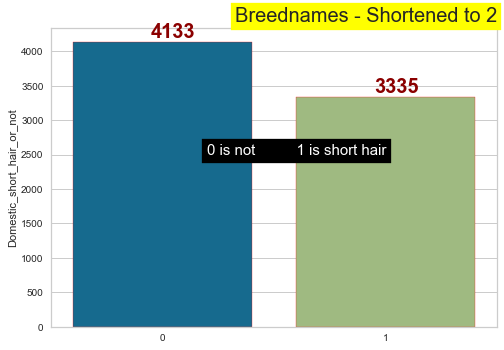

In [111]:
q = copy.value_counts()
hoho = sns.barplot(x=q.index ,y=q ,ec="red")

plt.title("Breednames - Shortened to 2",size=20,backgroundcolor="yellow",loc = "right")
plt.text(x= 0.2,y=2500 , s="0 is not          1 is short hair",c ="white",backgroundcolor ="black",size=15)
blank =[]
for i in range(0,len(hoho.patches)):
    bar = pd.Series(hoho.patches).iloc[i]
    height = bar.get_height()
    blank.append(height)
    if len(pd.Series(blank, dtype = int)[pd.Series(blank, dtype = int).isin([height])]) <2 :
#         if (i % 2) == 0:
            plt.text(bar.get_x()+bar.get_width()/2.3, height+8.005,
                        '%d' % int(height),
                        ha='left', va='bottom',c = "darkred",size = 20,weight ="demi",rotation = 0)
#         else: 
#             plt.text(bar.get_x() + bar.get_width()/5, height,
#                         '%d' % int(height),
#                         ha='left', va='bottom',c = "darkred",size = 8,weight ="demi",rotation = 90)

In [112]:
adoption_cat_n_dog_only_v4 = pd.concat([adoption_cat_n_dog_only_v4,copy],axis=1)
adoption_cat_n_dog_only_v4.head()

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,chipped_ornot,dead_or_alive,cats_n_dog,No. of times Fostered,location_1,location_2,location_3,location_4,Pure Breed or not,Domestic_short_hair_or_not
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,Jadzia,Domestic Short Hair,Tortie,Cat,9 years 2 months.,...,1,1,0,0,0,0,0,1,0,1
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,Gonzo,German Shepherd Dog/Mix,Tan,Dog,9 years 1 month.,...,1,1,1,0,0,0,1,0,1,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,Maggie,Shep Mix/Siberian Husky,Various,Dog,6 years 8 months.,...,1,1,1,0,0,0,1,0,1,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8 years 11 months.,...,1,1,0,1,0,0,1,1,0,1
4,31469,2013-03-26 00:00:00,Incompatible with owner lifestyle,0,D1303720,Bonnie,Basenji/Mix,Brown and White,Dog,5 years 11 months.,...,1,1,1,0,0,1,0,0,1,0


In [113]:
# woww = adoption_cat_n_dog_only_v4.breedname.value_counts()\
#           [adoption_cat_n_dog_only_v4.breedname.value_counts()>7]
# encoded = enc.fit_transform(woww.index.values.reshape(-1,1)).toarray()
# breednames = pd.DataFrame(encoded, columns = woww.index.unique())

# print("length is", len(breednames),"\n"+"Column # is ",len(breednames.columns),"\n...... since this is a \
# little much i might consider not including these at all.")
# breednames.head(3) #add on later

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 7) <font color = "teal"> basecolour </font>

### colours of cats n Dogs

<IPython.core.display.Javascript object>

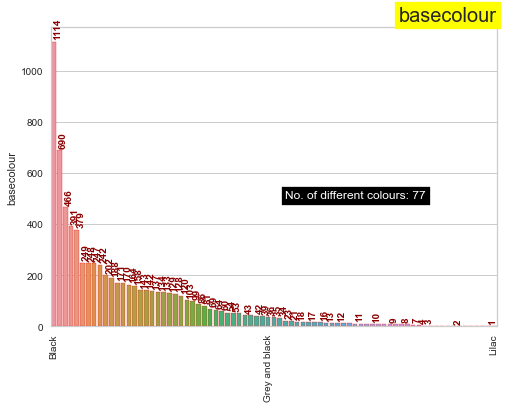

In [114]:
q = adoption_cat_n_dog_only_v4.basecolour.value_counts()
hoho = sns.barplot(x=q.index ,y=q ,ec="red")
plt.xticks([0,
           q.index.get_loc(str(pd.Series(q.index).iloc[int(len(q.index)/2 -1)])),
           q.index.get_loc(str(pd.Series(q.index).iloc[int(len(q.index) -1)]))]
          ,rotation = 90) #too many Breeds
plt.title("basecolour",size=20,backgroundcolor="yellow",loc = "right")
plt.text(x=40,y=500,s="No. of different colours: "+str(len(q)),backgroundcolor="Black",c="white")


blank =[]
for i in range(0,len(hoho.patches)):
    bar = pd.Series(hoho.patches).iloc[i]
    height = bar.get_height()
    blank.append(height)
    if len(pd.Series(blank, dtype = int)[pd.Series(blank, dtype = int).isin([height])]) <2 :
#         if (i % 2) == 0:
            plt.text(bar.get_x()+bar.get_width()/2.3, height+8.005,
                        '%d' % int(height),
                        ha='left', va='bottom',c = "darkred",size = 10,weight ="demi",rotation = 90)

### colours of cats n Dogs separately

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


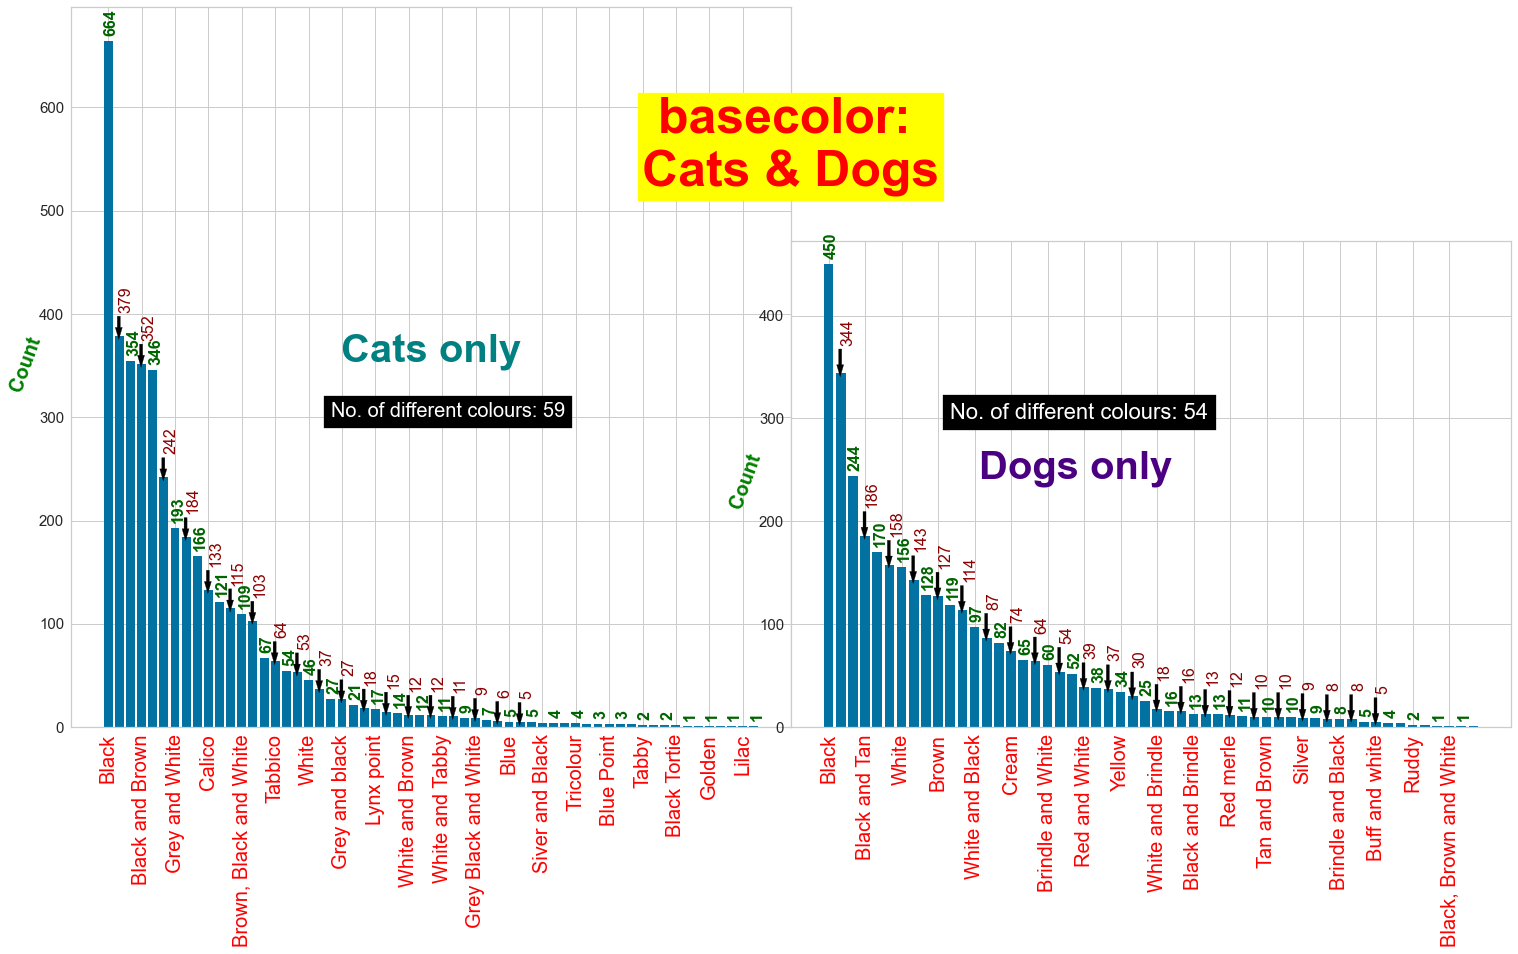

In [115]:
fig = plt.figure(figsize=(5,5))
# fig.subplots_adjust(top=0.8)
ax = fig.add_axes([0,0,2,2])

# ax = fig.add_axes([0,0.2,4,1])
# ax1= fig.add_axes([0,-1.5,4,1])
#                     l,b,w,h
x = adoption_cat_n_dog_only_v4.basecolour[adoption_cat_n_dog_only_v4.speciesname =="Cat"].value_counts().index
y = adoption_cat_n_dog_only_v4.basecolour[adoption_cat_n_dog_only_v4.speciesname =="Cat"].value_counts()

plt.xticks(pd.Series(range(0,len(x),3)), rotation = 90,c = "red",size = 20)
# plt.xticks([0,
#            q.index.get_loc(str(pd.Series(q.index).iloc[int(len(q.index)/2 -1)])),
#            q.index.get_loc(str(pd.Series(q.index).iloc[int(len(q.index) -1)]))]
#           ,rotation = 90)
plt.yticks(pd.Series(range(0,701,100)),size= 15)
plt.ylabel("Count",size = 20,c ="green",weight='extra bold',rotation = 70)
plt.text(x=20,y=300,s="No. of different colours: "+str(len(x)),backgroundcolor="Black",c="white",size =20)
blank=[]
def label_top_of_bars(bars):
    for i in range(0,len(bars)):
        bar = pd.Series(bars).iloc[i]
        height = bar.get_height()
        blank.append(height)
        if (i % 2) == 0:
            ax.text(bar.get_x(), height+5,
                        '%d' % int(height),
                        ha='left', va='bottom',c = "darkgreen",size = 16,weight ="demi",rotation = 90)
        else: 
            ax.annotate('%d' % int(height), xy=(bar.get_x()+0.35, height-5), 
                         xytext=(bar.get_x()+0.35, height+25),rotation=90,c="darkred",size=16,
            arrowprops=dict(facecolor='black', shrink=0.05,width =3,headwidth=7))
            
bar2 = ax.bar(x,y,)
ax.set_title("\n".join(["Cats only"]), c= "teal",fontsize = 40,weight='demi',loc="center",y=0.5)
label_top_of_bars(bar2)


ax1= fig.add_axes([2,0,2,1.35])
xx = adoption_cat_n_dog_only_v4.basecolour[adoption_cat_n_dog_only_v4.speciesname =="Dog"].value_counts().index
yy = adoption_cat_n_dog_only_v4.basecolour[adoption_cat_n_dog_only_v4.speciesname =="Dog"].value_counts()

plt.xticks(pd.Series(range(0,len(xx),3)), rotation = 90,c = "red",size = 20)
plt.yticks(pd.Series(range(0,701,100)),size= 15)
plt.ylabel("Count",size = 20,c ="green",weight='extra bold',rotation = 70)
plt.text(x=10,y=300,s="No. of different colours: "+str(len(xx)),backgroundcolor="Black",c="white",size =22)
blank=[]
def label_top_of_barss(bars):
    for i in range(0,len(bars)):
        bar = pd.Series(bars).iloc[i]
        height = bar.get_height()
        blank.append(height)
        if (i % 2) == 0:
            ax1.text(bar.get_x(), height+5,
                        '%d' % int(height),
                        ha='left', va='bottom',c = "darkgreen",size = 16,weight ="demi",rotation = 90)
        else: 
            ax1.annotate('%d' % int(height), xy=(bar.get_x()+0.35, height-5), 
                         xytext=(bar.get_x()+0.35, height+30),rotation=90,c="darkred",size=16,
            arrowprops=dict(facecolor='black', shrink=0.05,width =3,headwidth=7))
bar3 = ax1.bar(xx,yy)
ax1.set_title("\n".join(["Dogs only"]),c= "indigo",fontsize = 40,weight='demi',loc="right",x= 0.53,y=0.5)

label_top_of_barss(bar3)

plt.title("basecolor: \n"+"\n".join(["Cats & Dogs"]),x=-0, y=1.1,c= "red",fontsize = 50,weight='extra bold',backgroundcolor ="yellow")
plt.show()


<AxesSubplot:xlabel='basecolour'>

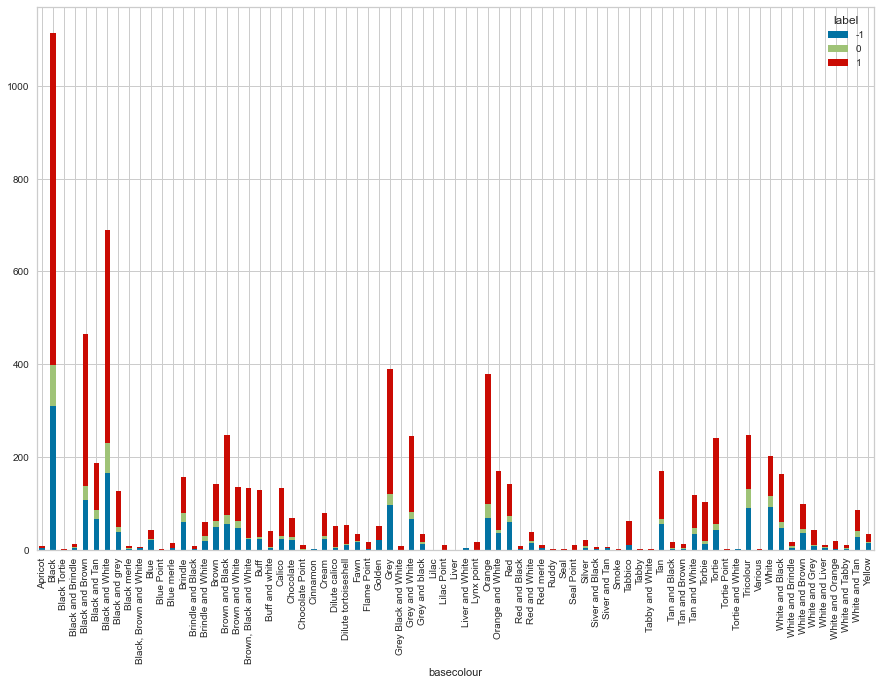

In [137]:
df_plot = adoption_cat_n_dog_only_v4.groupby(['basecolour', 'label']).size().reset_index().pivot(columns='label', index='basecolour', values=0)
df_plot.plot(kind='bar', stacked=True,figsize=(15,10))

In [117]:
basecolours = adoption_cat_n_dog_only_v4.basecolour.copy()

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
basecolours

0                     Tortie
1                        Tan
2                    Various
3       Dilute tortoiseshell
4            Brown and White
                ...         
7463        Orange and White
7464                  Calico
7465                     Red
7466               Tricolour
7467                   Brown
Name: basecolour, Length: 7468, dtype: object

In [119]:
basecolours.value_counts()[basecolours.value_counts()<100].sum()

1220

In [120]:
basecolours[basecolours.isin(basecolours.value_counts().index[basecolours.value_counts()<100].to_list())] = "Other"
basecolours.value_counts()

Other                     1220
Black                     1114
Black and White            690
Black and Brown            466
Grey                       391
Orange                     379
Brown and Black            249
Tricolour                  248
Grey and White             247
Tortie                     242
White                      202
Black and Tan              188
Orange and White           171
Tan                        170
White and Black            164
Brindle                    158
Red                        143
Brown                      142
Brown and White            137
Brown, Black and White     134
Calico                     133
Buff                       129
Black and grey             128
Tan and White              120
Torbie                     103
Name: basecolour, dtype: int64

In [121]:
import category_encoders as ce

encoder = ce.BinaryEncoder(return_df=True)
basecolourss = encoder.fit_transform(basecolours)
print("total columns", len(basecolourss.columns))
basecolourss

total columns 6


,basecolour_0,basecolour_1,basecolour_2,basecolour_3,basecolour_4,basecolour_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,0,1,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
7463,0,0,1,1,0,0
7464,0,1,1,0,0,1
7465,0,1,0,1,0,0
7466,0,0,1,1,1,0


In [122]:
adoption_cat_n_dog_only_v4 = \
pd.concat([adoption_cat_n_dog_only_v4,basecolourss.drop(columns="basecolour_0")],axis=1)
adoption_cat_n_dog_only_v4

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,location_2,location_3,location_4,Pure Breed or not,Domestic_short_hair_or_not,basecolour_1,basecolour_2,basecolour_3,basecolour_4,basecolour_5
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,Jadzia,Domestic Short Hair,Tortie,Cat,9 years 2 months.,...,0,0,1,0,1,0,0,0,0,1
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,Gonzo,German Shepherd Dog/Mix,Tan,Dog,9 years 1 month.,...,0,1,0,1,0,0,0,0,1,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,Maggie,Shep Mix/Siberian Husky,Various,Dog,6 years 8 months.,...,0,1,0,1,0,0,0,0,1,1
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8 years 11 months.,...,0,1,1,0,1,0,0,0,1,1
4,31469,2013-03-26 00:00:00,Incompatible with owner lifestyle,0,D1303720,Bonnie,Basenji/Mix,Brown and White,Dog,5 years 11 months.,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,Max,Domestic Medium Hair,Orange and White,Cat,21 weeks.,...,1,0,0,0,0,0,1,1,0,0
7464,64588,2019-08-27 18:14:11,Stray,0,C19081418,Punkin,Domestic Short Hair,Calico,Cat,6 weeks.,...,1,0,0,0,1,1,1,0,0,1
7465,64606,2019-08-29 12:10:21,Stray,0,D19081440,Dozer,Coonhound,Red,Dog,6 years 8 months.,...,1,0,1,0,0,1,0,1,0,0
7466,64608,2019-08-29 18:58:06,Stray,0,D19081421,Lucy Farmer,Beagle,Tricolour,Dog,7 years 5 months.,...,0,1,1,0,0,0,1,1,1,0


C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

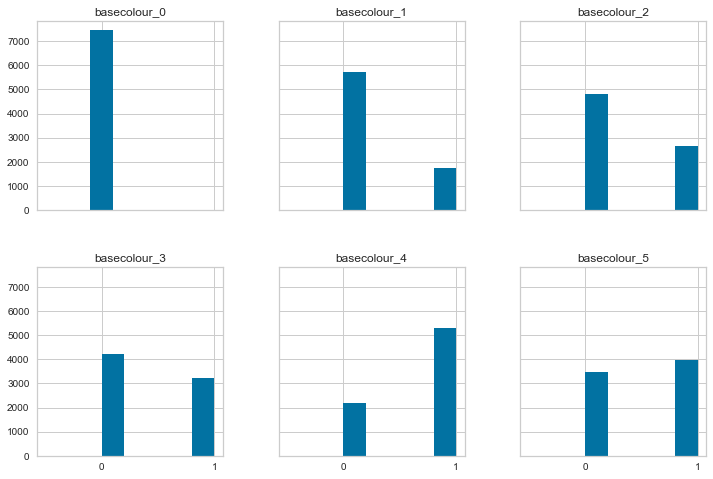

In [123]:
hoho=basecolourss.hist(layout=(2,3), figsize=(12,8), bins = 5,sharex= True,sharey = True)
plt.xticks(np.arange(0,1.02,1))
plt.show()

### basecolour_0 is all 0s

In [124]:
basecolourss['encodings'] = basecolourss[basecolourss.columns[:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
basecolourss

,basecolour_0,basecolour_1,basecolour_2,basecolour_3,basecolour_4,basecolour_5,encodings
0,0,0,0,0,0,1,"0,0,0,0,0,1"
1,0,0,0,0,1,0,"0,0,0,0,1,0"
2,0,0,0,0,1,1,"0,0,0,0,1,1"
3,0,0,0,0,1,1,"0,0,0,0,1,1"
4,0,0,0,1,0,0,"0,0,0,1,0,0"
...,...,...,...,...,...,...,...
7463,0,0,1,1,0,0,"0,0,1,1,0,0"
7464,0,1,1,0,0,1,"0,1,1,0,0,1"
7465,0,1,0,1,0,0,"0,1,0,1,0,0"
7466,0,0,1,1,1,0,"0,0,1,1,1,0"


In [125]:
basecolour_encodings = pd.concat([basecolours,basecolourss],axis=1).drop_duplicates(keep="first").sort_values('encodings')
basecolour_encodings.to_csv(\
            path_or_buf ="C:/Users/hi/Desktop/DATA SCIENCE/05 Data science fundamentals module 05/CAPSTONE/versions/basecolour_encodings.csv")
basecolour_encodings

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,basecolour,basecolour_0,basecolour_1,basecolour_2,basecolour_3,basecolour_4,basecolour_5,encodings
0,Tortie,0,0,0,0,0,1,"0,0,0,0,0,1"
1,Tan,0,0,0,0,1,0,"0,0,0,0,1,0"
2,Other,0,0,0,0,1,1,"0,0,0,0,1,1"
4,Brown and White,0,0,0,1,0,0,"0,0,0,1,0,0"
6,Brown and Black,0,0,0,1,0,1,"0,0,0,1,0,1"
7,Black,0,0,0,1,1,0,"0,0,0,1,1,0"
8,White,0,0,0,1,1,1,"0,0,0,1,1,1"
11,Grey and White,0,0,1,0,0,0,"0,0,1,0,0,0"
14,Torbie,0,0,1,0,0,1,"0,0,1,0,0,1"
21,Grey,0,0,1,0,1,0,"0,0,1,0,1,0"


In [126]:
basecolour_encodings = pd.concat([basecolours,basecolourss],axis=1).drop_duplicates(keep="first").sort_values('encodings')
basecolour_encodings.to_csv(\
            path_or_buf ="C:/Users/hi/Desktop/DATA SCIENCE/05 Data science fundamentals module 05/CAPSTONE/versions/basecolour_encodings.csv")
basecolour_encodings

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,basecolour,basecolour_0,basecolour_1,basecolour_2,basecolour_3,basecolour_4,basecolour_5,encodings
0,Tortie,0,0,0,0,0,1,"0,0,0,0,0,1"
1,Tan,0,0,0,0,1,0,"0,0,0,0,1,0"
2,Other,0,0,0,0,1,1,"0,0,0,0,1,1"
4,Brown and White,0,0,0,1,0,0,"0,0,0,1,0,0"
6,Brown and Black,0,0,0,1,0,1,"0,0,0,1,0,1"
7,Black,0,0,0,1,1,0,"0,0,0,1,1,0"
8,White,0,0,0,1,1,1,"0,0,0,1,1,1"
11,Grey and White,0,0,1,0,0,0,"0,0,1,0,0,0"
14,Torbie,0,0,1,0,0,1,"0,0,1,0,0,1"
21,Grey,0,0,1,0,1,0,"0,0,1,0,1,0"


### remove the basecolour_0

In [127]:
basecoloursss = basecolourss.drop(columns = ["basecolour_0","encodings"],axis=1).copy()
basecoloursss['encodings'] = basecoloursss[basecoloursss.columns[:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
basecoloursss

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,basecolour_1,basecolour_2,basecolour_3,basecolour_4,basecolour_5,encodings
0,0,0,0,0,1,"0,0,0,0,1"
1,0,0,0,1,0,"0,0,0,1,0"
2,0,0,0,1,1,"0,0,0,1,1"
3,0,0,0,1,1,"0,0,0,1,1"
4,0,0,1,0,0,"0,0,1,0,0"
...,...,...,...,...,...,...
7463,0,1,1,0,0,"0,1,1,0,0"
7464,1,1,0,0,1,"1,1,0,0,1"
7465,1,0,1,0,0,"1,0,1,0,0"
7466,0,1,1,1,0,"0,1,1,1,0"


In [128]:
basecolour_encodings_no_0 = pd.concat([basecolours,basecoloursss],axis=1).drop_duplicates(keep="first").sort_values('encodings')
basecolour_encodings_no_0.to_csv(\
            path_or_buf ="C:/Users/hi/Desktop/DATA SCIENCE/05 Data science fundamentals module 05/CAPSTONE/versions/basecolour_encodings_no_0.csv")
basecolour_encodings_no_0

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,basecolour,basecolour_1,basecolour_2,basecolour_3,basecolour_4,basecolour_5,encodings
0,Tortie,0,0,0,0,1,"0,0,0,0,1"
1,Tan,0,0,0,1,0,"0,0,0,1,0"
2,Other,0,0,0,1,1,"0,0,0,1,1"
4,Brown and White,0,0,1,0,0,"0,0,1,0,0"
6,Brown and Black,0,0,1,0,1,"0,0,1,0,1"
7,Black,0,0,1,1,0,"0,0,1,1,0"
8,White,0,0,1,1,1,"0,0,1,1,1"
11,Grey and White,0,1,0,0,0,"0,1,0,0,0"
14,Torbie,0,1,0,0,1,"0,1,0,0,1"
21,Grey,0,1,0,1,0,"0,1,0,1,0"


## Movementtype

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='movementtype', ylabel='count'>

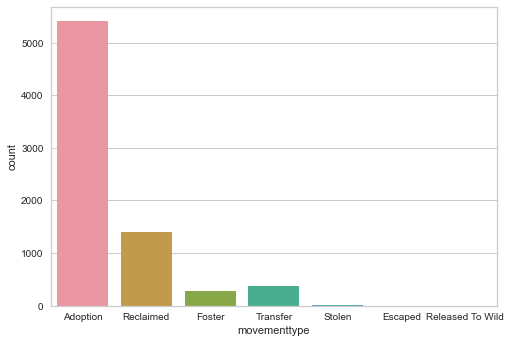

In [139]:
sns.countplot(data=adoption_cat_n_dog_only_v4,x="movementtype")

### add the binary encoding to my data set

In [129]:
adoption_cat_n_dog_only_v4.to_csv(\
            path_or_buf ="C:/Users/hi/Desktop/DATA SCIENCE/05 Data science fundamentals module 05/CAPSTONE/versions/adoption_cat_n_dog_only_v4.csv")

C:\Users\hi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### file is too long move to pt 2....